<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Muhammad !

Perkenalkan saya Code Reviewers, disini saya akan mereview tugas Muhammad ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Muhammad dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

## Final Project 
# Peramalan Keberhentian Pelanggan Telekomunikasi Menggunakan Pembelajaran Mesin 

Operator telekomunikasi Interconnect ingin dapat meramalkan churn (kepergian) klien mereka. Jika ditemukan bahwa seorang pengguna berencana untuk pergi, mereka akan ditawari kode promosi dan opsi paket khusus. Tim pemasaran Interconnect telah mengumpulkan beberapa data pribadi kliennya, termasuk informasi tentang paket dan kontrak mereka.

# Layanan Interconnect

Interconnect terutama menyediakan dua jenis layanan:

1. Komunikasi melalui telepon tetap. Telepon dapat dihubungkan ke beberapa saluran secara bersamaan.
2. Internet. Jaringan dapat disetel melalui saluran telepon (DSL, *digital subscriber line*) atau melalui kabel serat optik.

Beberapa layanan lain yang disediakan perusahaan termasuk:

- Keamanan internet: perangkat lunak antivirus (*DeviceProtection*) dan pemblokir situs web berbahaya (*OnlineSecurity*)
- Layanan dukungan teknis khusus (*TechSupport*)
- Penyimpanan file awan dan cadangan data (*OnlineBackup*)
- Streaming TV (*StreamingTV*) dan direktori film (*StreamingMovies*)

Klien dapat memilih pembayaran bulanan atau menandatangani kontrak 1 atau 2 tahun. Mereka dapat menggunakan berbagai metode pembayaran dan menerima faktur elektronik setelah transaksi.

# Deskripsi Data

Data terdiri dari file yang diperoleh dari berbagai sumber:

- `contract.csv` — informasi kontrak
- `personal.csv` — data pribadi klien
- `internet.csv` — informasi tentang layanan internet
- `phone.csv` — informasi tentang layanan telepon

Di setiap file, kolom `customerID` berisi kode unik yang ditetapkan untuk setiap klien.

Informasi kontrak berlaku per 1 Februari 2020.

# Data

[final_provider.zip](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/ac39c23b-718e-4cd6-bdaa-85b3a127a457/final_provider.zip)

Data juga berada di platform dalam folder `/datasets/final_provider/`.


# Tujuan
Tujuan dari proyek ini adalah:

1. Membangun model machine learning untuk meramalkan churn / berhenti berhenti berlangganan klien Interconnect telecom.
2. Menerapkan analisis data eksploratif untuk menentukan apakah layanan promosi khusus dan opsi paket dapat mencegah churn / berhenti berlangganan klien Interconnect telecom.
3. Menganalisis kecepatan dan kualitas prediksi, waktu yang dibutuhkan untuk pelatihan, dll.


# Daftar Pustaka 

1. [Membuka file data dan mempelajari informasi umum](#section1)
2. [Pra-Pemrosesan Data](#section2)
3. [Analisis Data Eskporatif](#section3)
4. [Proses Pemodelan](#section4)
5. [Model Training](#section5)
6. [Evaluasi Model](#section6)
7. [Rangkuman](#section7)
8. [Laporan Tugas](#section8)


<a id='section1'></a>
## Buka data dan pelajari informasi umum
Kita membutuhkan pustaka berikut: pandas dan numpy untuk pra-pemrosesan dan manipulasi data, matplotlib dan seaborn untuk visualisasi data.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# Perpustakaan Project

In [1]:
import numpy as np
import pandas as pd
import time
from datetime import datetime
from IPython.display import display

# matplotlib untuk visualisasi
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn untuk visualisasi data statistik
import seaborn as sns

# impor modul untuk pemisahan dan validasi silang menggunakan pencarian grid
from sklearn.model_selection import train_test_split, GridSearchCV

# impor modul untuk pra-pemrosesan
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None # untuk menghindari SettingWithCopyWarning setelah penskalaan

# impor modul machine learning dari pustaka sklearn
from sklearn.dummy import DummyClassifier # impor classifier dummy
from sklearn.tree import DecisionTreeClassifier # impor classifier decision tree
from sklearn.linear_model import LogisticRegression # impor logistic regression
from sklearn.ensemble import RandomForestClassifier # impor algoritma random forest
from catboost import CatBoostClassifier # impor classifier catboost
from lightgbm import LGBMClassifier # impor classifier lightgbm
from xgboost import XGBClassifier # impor classifier xgboost

# impor metrik untuk pemeriksaan model
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

# impor peringatan
import warnings
warnings.filterwarnings('ignore')

# impor utilitas sklearn
from sklearn.utils import shuffle

print('Pustaka proyek telah berhasil diimpor!')


Pustaka proyek telah berhasil diimpor!


In [2]:
# membaca data

contract_data = pd.read_csv('final_project/final_provider/contract.csv')
internet_data = pd.read_csv('final_project/final_provider/internet.csv')
personal_data = pd.read_csv('final_project/final_provider/personal.csv')
phone_data    = pd.read_csv('final_project/final_provider/phone.csv')

print('Data berhasil terbaca!')

Data berhasil terbaca!


In [3]:
# fungsi untuk menentukan apakah kolom dalam file memiliki nilai null
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Kolom {} memiliki {:.{}%} persen nilai Null, dan {} nilai null'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'Ada {} kolom dengan nilai NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'Tidak ada kolom dengan nilai NA.' + "\033[0m")

# fungsi untuk menampilkan informasi umum tentang dataset
def get_info(df):
    """
    Fungsi ini menggunakan metode head(), info(), describe(), shape() dan duplicated()
    untuk menampilkan informasi umum tentang dataset.
    """
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe(include='object'))
    print()
    print('Kolom dengan nulls:')
    display(get_percent_of_na(df, 4))  # periksa ini
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'Kita memiliki {} baris yang duplikat.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()


In [4]:
# mempelajari informasi umum tentang dataset kontrak
print('Informasi umum tentang dataset kontrak')
get_info(contract_data)


Informasi umum tentang dataset kontrak
----------------------------------------------------------------------------------------------------
Head:



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


----------------------------------------------------------------------------------------------------


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043
unique,7043,77,5,3,2,4,6531
top,8097-VBQTZ,2014-02-01,No,Month-to-month,Yes,Electronic check,
freq,1,366,5174,3875,4171,2365,11



Kolom dengan nulls:

Tidak ada kolom dengan nilai NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(7043, 8)
----------------------------------------------------------------------------------------------------
Duplicated:
Kita memiliki 0 baris yang duplikat.




<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

In [5]:
# mempelajari informasi umum tentang dataset internet
print('Informasi umum tentang dataset internet')
get_info(internet_data)


Informasi umum tentang dataset internet
----------------------------------------------------------------------------------------------------
Head:



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,9831-BPFRI,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


----------------------------------------------------------------------------------------------------


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,9831-BPFRI,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785



Kolom dengan nulls:

Tidak ada kolom dengan nilai NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(5517, 8)
----------------------------------------------------------------------------------------------------
Duplicated:
Kita memiliki 0 baris yang duplikat.




<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

In [6]:
# mempelajari informasi umum tentang dataset personal
print('Informasi umum tentang dataset personal')
get_info(personal_data)

Informasi umum tentang dataset personal
----------------------------------------------------------------------------------------------------
Head:



,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


----------------------------------------------------------------------------------------------------


,customerID,gender,Partner,Dependents
count,7043,7043,7043,7043
unique,7043,2,2,2
top,8097-VBQTZ,Male,No,No
freq,1,3555,3641,4933



Kolom dengan nulls:

Tidak ada kolom dengan nilai NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(7043, 5)
----------------------------------------------------------------------------------------------------
Duplicated:
Kita memiliki 0 baris yang duplikat.




<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

In [7]:
# mempelajari informasi umum tentang dataset telepon
print('Informasi umum tentang dataset telepon')
get_info(phone_data)


Informasi umum tentang dataset telepon
----------------------------------------------------------------------------------------------------
Head:



,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,8097-VBQTZ,No
freq,1,3390


----------------------------------------------------------------------------------------------------


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,8097-VBQTZ,No
freq,1,3390



Kolom dengan nulls:

Tidak ada kolom dengan nilai NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(6361, 2)
----------------------------------------------------------------------------------------------------
Duplicated:
Kita memiliki 0 baris yang duplikat.




Dengan melihat informasi umum tentang data, kita menemukan bahwa:

- `contract_data` memiliki 7043 baris dan 8 kolom tanpa nilai yang hilang dan tanpa nilai yang duplikat
- `internet_data` memiliki 5517 baris dan 8 kolom tanpa nilai yang hilang dan tanpa nilai yang duplikat
- `personal_data` memiliki 7043 baris dan 5 kolom tanpa nilai yang hilang dan tanpa nilai yang duplikat
- `phone_data` memiliki 6361 baris dan 2 kolom tanpa nilai yang hilang dan tanpa nilai yang duplikat

Kita perlu mengubah datatype ke tipe data yang benar. Misalnya, dalam contract_data, kita perlu mengubah BeginDate, EndDate menjadi Datetime dan TotalCharges menjadi float. Kita juga perlu melakukan pra-pemrosesan data dan menghasilkan fitur baru untuk machine learning.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<a id='section2'></a>
## Pra-Pemrosesan Data
Pada bagian ini, kita akan melakukan wrangling data. Kita harus menggabungkan dataset, mengganti nama kolom, mengubah tipe data, dan melakukan rekayasa fitur.

### Penggabungan Dataset
Sebelum kita mulai melakukan pra-pemrosesan data, kita bisa menggabungkan semua dataset individu menjadi satu dataframe menggunakan fungsi `merge()` di pandas.

In [8]:
# menggabungkan dataset
merged_df = pd.merge(contract_data, internet_data, on="customerID", how='left')
merged_df1 = pd.merge(merged_df, personal_data, on="customerID", how='left')
merged_df2 = pd.merge(merged_df1, phone_data, on="customerID", how='left')
merged_df2 = merged_df2.fillna('No')
merged_df2.sample(10)


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
948,7028-DVOIQ,2017-02-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,99.05,3395.8,Fiber optic,No,No,Yes,No,Yes,Yes,Male,1,No,No,Yes
5476,6060-DRTNL,2019-05-01,2019-10-01 00:00:00,Month-to-month,Yes,Mailed check,84.85,415.55,Fiber optic,No,No,Yes,No,Yes,No,Female,1,No,No,No
3130,0496-AHOOK,2018-02-01,No,One year,No,Bank transfer (automatic),74.40,1712.9,DSL,Yes,No,No,Yes,Yes,Yes,Male,0,Yes,No,No
3873,7340-KEFQE,2015-11-01,No,Two year,No,Bank transfer (automatic),34.20,1782,DSL,Yes,No,No,Yes,No,No,Female,0,Yes,Yes,No
3951,5915-ANOEI,2014-04-01,No,Two year,No,Mailed check,79.15,5536.5,DSL,Yes,Yes,Yes,Yes,Yes,No,Male,0,Yes,No,Yes
5090,6502-HCJTI,2019-03-01,2019-10-01 00:00:00,Month-to-month,Yes,Credit card (automatic),94.70,673.1,Fiber optic,Yes,Yes,No,No,No,Yes,Male,1,Yes,No,Yes
3477,7801-KICAO,2018-08-01,No,Month-to-month,Yes,Electronic check,74.15,1345.75,Fiber optic,No,No,No,No,No,No,Female,0,No,No,Yes
1481,9242-TKFSV,2014-02-01,No,Two year,Yes,Credit card (automatic),65.10,4754.3,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Male,0,Yes,Yes,No
1126,0927-LCSMG,2019-06-01,2020-01-01 00:00:00,Month-to-month,No,Mailed check,74.65,544.55,Fiber optic,No,No,Yes,No,No,No,Male,0,No,No,No
4346,9351-LZYGF,2016-08-01,No,Month-to-month,Yes,Credit card (automatic),66.40,2727.8,DSL,Yes,Yes,No,Yes,No,No,Female,0,Yes,No,Yes


In [9]:
# membuat salinan dataset
telecom_df = merged_df2.copy()
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Mengganti Nama Kolom
Langkah selanjutnya dalam pra-pemrosesan data akan menjadi mengganti nama kolom dalam dataset kita.

In [10]:
# mengganti nama kolom
telecom_df = telecom_df.rename(columns={'customerID': 'customer_id', 'BeginDate': 'begin_date', 'EndDate': 'end_date', 'Type': 'type',
       'PaperlessBilling': 'paperless_billing', 'PaymentMethod': 'payment_method', 'MonthlyCharges': 'monthly_charges', 'TotalCharges': 'total_charges',
       'gender': 'gender', 'SeniorCitizen': 'senior_citizen', 'Partner': 'partner', 'Dependents': 'dependents', 'MultipleLines': 'multiple_lines',
       'InternetService': 'internet_service', 'OnlineSecurity': 'online_security', 'OnlineBackup': 'online_backup', 'DeviceProtection': 'device_protection',
       'TechSupport': 'tech_support', 'StreamingTV': 'streaming_tv', 'StreamingMovies': 'streaming_movies'})


In [11]:
# memeriksa nama kolom yang telah di ganti
print('Dataset yang telah diganti nama kolomnya')
telecom_df.info()

Dataset yang telah diganti nama kolomnya
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  gender             7043 non-nul

Kita telah berhasil mengubah nama kolom sehingga nama kolom akan seragam, dengan menggunakan snake case untuk meningkatkan keterbacaan. Fungsi `rename()` dalam pandas digunakan untuk membuat perubahan ini.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Mengubah Tipe Data
Selanjutnya, kita ubah tipe data ke format yang benar. Misalnya, `begin_date` dan `end_date` akan diubah menjadi Datetime,`monthly_charges` dan `total_charges` menjadi float32, `senior_citizen` menjadi tipe data int32.

In [12]:
# fungsi untuk mengubah data ke tipe yang benar
def change_datatype(df, cols, type_val):
    for col in cols:
        df[col] = df[col].astype(type_val)

# membuat fitur end_date baru
list_value = []
for value in telecom_df.end_date:
    if value != 'No':
        datetime_value = datetime.strptime(value, '%Y-%m-%d %H:%M:%S')
        list_value.append(datetime_value)
    else:
        contract_valid_date = '2020-02-01 00:00:00' # tanggal kontrak masih berlaku
        contract_valid_date_value = datetime.strptime(contract_valid_date, '%Y-%m-%d %H:%M:%S')
        list_value.append(contract_valid_date_value)
EndDate_value = pd.to_datetime(list_value)
telecom_df.insert(3, 'end_date_value', EndDate_value)

# menyiapkan TotalChargers 
telecom_df.loc[telecom_df['total_charges'].isin([' ']),'total_charges'] = 0

# mengubah tipe data
change_datatype(telecom_df, ['begin_date'], 'datetime64[ns]')
change_datatype(telecom_df, ['monthly_charges', 'total_charges'], 'float32')
change_datatype(telecom_df, ['senior_citizen'], 'int32')

In [13]:
# periksa informasi data
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   end_date_value     7043 non-null   datetime64[ns]
 4   type               7043 non-null   object        
 5   paperless_billing  7043 non-null   object        
 6   payment_method     7043 non-null   object        
 7   monthly_charges    7043 non-null   float32       
 8   total_charges      7043 non-null   float32       
 9   internet_service   7043 non-null   object        
 10  online_security    7043 non-null   object        
 11  online_backup      7043 non-null   object        
 12  device_protection  7043 non-null   object        
 13  tech_support       7043 non-null   object        
 14  streamin

Di sini, kita pertama-tama mendefinisikan fungsi change_datatype yang mengubah tipe data dari kolom tertentu di dataframe. Kemudian kita membuat fitur end_date baru dan mengubah beberapa kolom ke tipe data yang tepat. Misalnya, kita mengubah `begin_date` ke `datetime64[ns]`, `monthly_charges` dan `total_charges` menjadi `float32`, dan `senior_citizen` menjadi `int32`. Selain itu, kita juga mengganti nilai kosong pada `total_charges` dengan 0.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Rekayasa Fitur
Di sini, kita akan membuat fitur baru seperti durasi layanan (tenure), target `end_date exited` yang ditunjukkan sebagai 0 untuk tidak ada penghentian layanan (churn) dan 1 untuk adanya penghentian layanan, `service_count` yang menunjukkan jumlah produk (atau layanan) yang saat ini digunakan oleh pelanggan, `has_crcard` yang menunjukkan bahwa pelanggan menggunakan kartu kredit untuk pembayaran, serta tahun, bulan, dan hari dalam seminggu dimana pelanggan mulai menggunakan layanan Interconnect.

In [14]:
# mengubah tipe tanggal menjadi datetime dan membaginya menjadi hari, bulan, dan tahun
def new_date_features(df):
    columns = df.columns.tolist()
    idx = [columns.index(x) for x in columns if 'begin_date' in x][0]
    
    df[columns[idx]] = pd.to_datetime(df[columns[idx]])
    df['dayofweek'] = df[columns[idx]].dt.day_name()
    df['month'] = df[columns[idx]].dt.month_name()
    df['year'] = df[columns[idx]].dt.year
    return df;    

In [15]:
# menambahkan fitur baru ke data
new_date_features(telecom_df)
telecom_df['tenure'] = telecom_df['end_date_value'].dt.year - telecom_df['begin_date'].dt.year
telecom_df['has_crcard'] = [1 if x == 'Credit card (automatic)' else 0 for x in telecom_df['payment_method']]
telecom_df['exited'] = [1 if x != 'No' else 0 for x in telecom_df['end_date']]
telecom_df['service_count'] = [x.count('Yes') for x in zip(telecom_df['online_security'], telecom_df['online_backup'], telecom_df['device_protection'], 
                                                           telecom_df['tech_support'], telecom_df['streaming_tv'], telecom_df['streaming_movies'])]
change_datatype(telecom_df, ['year', 'tenure', 'has_crcard', 'exited', 'service_count'], 'int32') # mengurangi penggunaan memori dengan mengubah tipe data


In [16]:
# periksa dataframe
telecom_df.head(10)

,customer_id,begin_date,end_date,end_date_value,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,...,partner,dependents,multiple_lines,dayofweek,month,year,tenure,has_crcard,exited,service_count
0,7590-VHVEG,2020-01-01,No,2020-02-01,Month-to-month,Yes,Electronic check,29.850000,29.850000,DSL,...,Yes,No,No,Wednesday,January,2020,0,0,0,1
1,5575-GNVDE,2017-04-01,No,2020-02-01,One year,No,Mailed check,56.950001,1889.500000,DSL,...,No,No,No,Saturday,April,2017,3,0,0,2
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,2019-12-01,Month-to-month,Yes,Mailed check,53.849998,108.150002,DSL,...,No,No,No,Tuesday,October,2019,0,0,1,2
3,7795-CFOCW,2016-05-01,No,2020-02-01,One year,No,Bank transfer (automatic),42.299999,1840.750000,DSL,...,No,No,No,Sunday,May,2016,4,0,0,3
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,2019-11-01,Month-to-month,Yes,Electronic check,70.699997,151.649994,Fiber optic,...,No,No,No,Sunday,September,2019,0,0,1,0
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,2019-11-01,Month-to-month,Yes,Electronic check,99.650002,820.500000,Fiber optic,...,No,No,Yes,Friday,March,2019,0,0,1,3
6,1452-KIOVK,2018-04-01,No,2020-02-01,Month-to-month,Yes,Credit card (automatic),89.099998,1949.400024,Fiber optic,...,No,Yes,Yes,Sunday,April,2018,2,1,0,2
7,6713-OKOMC,2019-04-01,No,2020-02-01,Month-to-month,No,Mailed check,29.750000,301.899994,DSL,...,No,No,No,Monday,April,2019,1,0,0,1
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,2019-11-01,Month-to-month,Yes,Electronic check,104.800003,3046.050049,Fiber optic,...,Yes,No,Yes,Saturday,July,2017,2,0,1,4
9,6388-TABGU,2014-12-01,No,2020-02-01,One year,No,Bank transfer (automatic),56.150002,3487.949951,DSL,...,No,Yes,No,Monday,December,2014,6,0,0,2


Menggunakan list comprehension, kita telah berhasil membuat fitur baru yang relevan untuk dataset. Fitur-fitur yang dihasilkan seperti 'tenure', 'exited', 'service_count', 'has_crcard', 'year', 'month', dan 'dayofweek'.

- 'Tenure' merujuk pada durasi waktu seorang pelanggan telah berlangganan layanan. Fitur ini penting karena pelanggan yang telah berlangganan lebih lama cenderung kurang mungkin berhenti berlangganan (churn).
- 'Exited' adalah fitur target yang menunjukkan apakah pelanggan berhenti berlangganan atau tidak.
- 'Service_count' adalah jumlah layanan yang diambil pelanggan. Ini bisa memberi kita wawasan tentang seberapa besar keterlibatan pelanggan dengan layanan yang kita tawarkan.
- 'Has_crcard' mengindikasikan apakah pelanggan menggunakan kartu kredit untuk pembayaran atau tidak.
- 'Year', 'month', dan 'dayofweek' adalah fitur yang dihasilkan dari tanggal dan dapat memberikan wawasan tambahan tentang pola pelanggan dalam berlangganan layanan.

Semua fitur ini akan membantu model pembelajaran mesin kita untuk menghindari bias saat membangun model. Kita juga tidak ingin memiliki terlalu banyak fitur untuk menghindari variansi tinggi. Variansi tinggi biasanya terjadi ketika model terlalu kompleks dan berisiko overfitting, yaitu ketika model belajar terlalu detail dari data pelatihan dan tidak mampu memberikan kinerja yang baik pada data yang belum pernah dilihat sebelumnya.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<a id='section3'></a>
## Analisis Data Eksploratif
Dalam mengeksplorasi data, kita akan mengajukan berbagai pertanyaan yang memerlukan jawaban untuk mengungkap atau memahami data.

### Memeriksa korelasi dalam data

In [17]:
# Mencari korelasi antar kolom dalam data
correlation_matrix = telecom_df.corr()

# Menampilkan matriks korelasi
correlation_matrix

,monthly_charges,total_charges,senior_citizen,year,tenure,has_crcard,exited,service_count
monthly_charges,1.000000,0.651174,0.220173,-0.264251,0.215257,0.030550,0.193356,0.724706
total_charges,0.651174,1.000000,0.103006,-0.819539,0.799383,0.182915,-0.198324,0.744827
senior_citizen,0.220173,0.103006,1.000000,-0.028418,0.004369,-0.024135,0.150889,0.067493
year,-0.264251,-0.819539,-0.028418,1.000000,-0.982735,-0.225887,0.291621,-0.490509
tenure,0.215257,0.799383,0.004369,-0.982735,1.000000,0.232277,-0.431905,0.472490
has_crcard,0.030550,0.182915,-0.024135,-0.225887,0.232277,1.000000,-0.134302,0.132626
exited,0.193356,-0.198324,0.150889,0.291621,-0.431905,-0.134302,1.000000,-0.087698
service_count,0.724706,0.744827,0.067493,-0.490509,0.472490,0.132626,-0.087698,1.000000


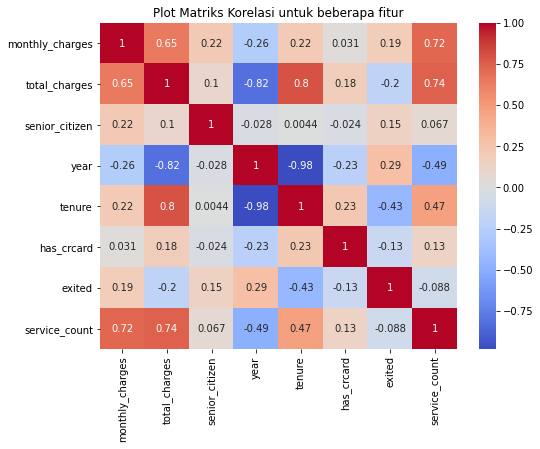

In [18]:
# Membuat figure dengan ukuran tertentu
plt.figure(figsize=(8, 6))

# Menghitung matriks korelasi
corrMatrix = telecom_df.corr()

# Membuat heatmap dari matriks korelasi
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')

# Menambahkan judul untuk plot
plt.title('Plot Matriks Korelasi untuk beberapa fitur')

# Menampilkan plot
plt.show();

Dari plot matriks korelasi, kita bisa melihat hubungan antara beberapa fitur:

1. Ada korelasi positif yang kuat antara `monthly_charges` dan `service_count`. Ini berarti bahwa semakin banyak layanan yang digunakan oleh pelanggan, semakin besar biaya bulanan mereka. Ini masuk akal karena lebih banyak layanan biasanya berarti lebih banyak biaya.

2. Ada korelasi positif yang kuat antara `tenure` (lama berlangganan) dan `total_charges` (total biaya). Ini berarti bahwa pelanggan yang telah berlangganan lebih lama cenderung telah membayar lebih banyak biaya.

3. Ada korelasi negatif yang kuat antara `tenure` dan `exited` (berhenti berlangganan). Ini berarti bahwa pelanggan yang telah berlangganan lebih lama cenderung kurang mungkin untuk berhenti berlangganan. 

4. Ada korelasi negatif yang kuat antara `year` (tahun berlangganan) dan `total_charges`. Ini berarti bahwa pelanggan yang telah berlangganan lebih lama cenderung membayar biaya yang lebih rendah. 


Namun mari kita analisis lebih dalam mengenai keterkaitan fitur lebih lanjut.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

###  Bagaimana perbandingan distribusi pembayaran bulanan (MonthlyCharges) antara semua klien aktif dengan klien yang telah berhenti? 

Active Customers:
 count    5174.000000
mean       61.265125
std        31.092648
min        18.250000
25%        25.100000
50%        64.424999
75%        88.400002
max       118.750000
Name: monthly_charges, dtype: float64

Exited Customers:
 count    1869.000000
mean       74.441330
std        24.666054
min        18.850000
25%        56.150002
50%        79.650002
75%        94.199997
max       118.349998
Name: monthly_charges, dtype: float64


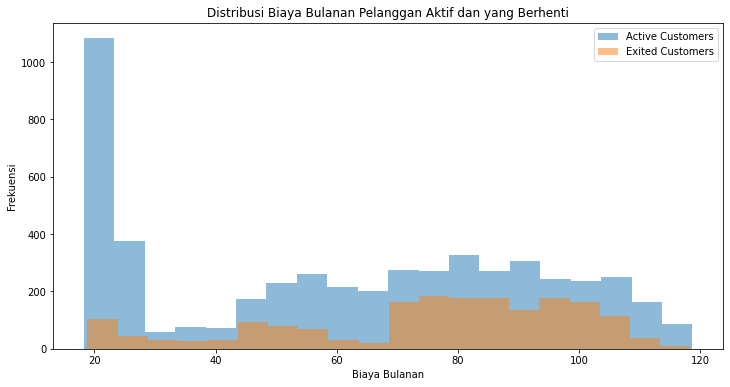

In [19]:
# Membagi data menjadi dua grup
active_customers = telecom_df[telecom_df['exited'] == 0]['monthly_charges']
exited_customers = telecom_df[telecom_df['exited'] == 1]['monthly_charges']

# Menghitung statistik yang dibutuhkan
statistics_active = active_customers.describe(percentiles=[.25, .5, .75])
statistics_exited = exited_customers.describe(percentiles=[.25, .5, .75])

# Mencetak hasil statistik
print("Active Customers:\n", statistics_active)
print("\nExited Customers:\n", statistics_exited)

# Membuat histogram distribusi
plt.figure(figsize=(12,6))

plt.hist(active_customers, bins=20, alpha=0.5, label='Active Customers')
plt.hist(exited_customers, bins=20, alpha=0.5, label='Exited Customers')

plt.title('Distribusi Biaya Bulanan Pelanggan Aktif dan yang Berhenti')
plt.xlabel('Biaya Bulanan')
plt.ylabel('Frekuensi')
plt.legend(loc='upper right')

plt.show()


Dari analisis statistik dan histogram distribusi biaya bulanan (*monthly charges*), kita dapat menarik beberapa kesimpulan:

1. Rata-rata biaya bulanan pelanggan yang masih aktif adalah sekitar 61.27, sedangkan pelanggan yang telah berhenti memiliki rata-rata biaya bulanan sekitar 74.44. Ini menunjukkan bahwa pelanggan yang membayar lebih banyak setiap bulan cenderung berhenti lebih banyak daripada mereka yang membayar lebih sedikit.

2. Pelanggan yang masih aktif memiliki variasi biaya bulanan yang lebih besar dibandingkan dengan pelanggan yang telah berhenti. Hal ini ditunjukkan oleh nilai standar deviasi untuk masing-masing kelompok.

3. Pelanggan yang masih aktif memiliki rentang biaya bulanan yang lebih luas dibandingkan dengan pelanggan yang telah berhenti. Nilai minimum dan maksimum untuk kedua kelompok menunjukkan ini.

4. Untuk pelanggan yang masih aktif, 25% dari mereka membayar 25.10 atau kurang setiap bulan, dan 75% membayar 88.40 atau kurang. Di sisi lain, untuk pelanggan yang telah berhenti, 25% dari mereka membayar 56.15 atau kurang setiap bulan, dan 75% membayar 94.20 atau kurang. 

Dari sini, kita dapat melihat bahwa pelanggan yang berhenti umumnya membayar lebih banyak setiap bulan dibandingkan dengan pelanggan yang masih aktif. Hal ini dapat menunjukkan bahwa harga mungkin merupakan faktor penentu dalam keputusan pelanggan untuk berhenti. Mungkin mereka merasa bahwa mereka tidak mendapatkan nilai yang cukup untuk biaya yang mereka bayar. Ini adalah sesuatu yang perusahaan mungkin ingin investigasi lebih lanjut untuk strategi retensi pelanggan mereka.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Bagaimana perilaku pengguna layanan telepon dan internet antara pelanggan yang masih aktif dan yang telah berhenti berlangganan?

In [20]:
# Mendefinisikan pengguna telepon dan internet
telecom_df['telephone_user'] = np.where(telecom_df['multiple_lines'] == 'Yes', 1, 0)
telecom_df['internet_user'] = np.where(telecom_df['internet_service'] != 'No', 1, 0)

# Membagi data menjadi dua grup
active_customers = telecom_df[telecom_df['exited'] == 0]
exited_customers = telecom_df[telecom_df['exited'] == 1]

# Menghitung bagian pengguna telepon di kedua grup
telephone_user_share_active = active_customers['telephone_user'].mean()
telephone_user_share_exited = exited_customers['telephone_user'].mean()

# Menghitung bagian pengguna internet di kedua grup
internet_user_share_active = active_customers['internet_user'].mean()
internet_user_share_exited = exited_customers['internet_user'].mean()

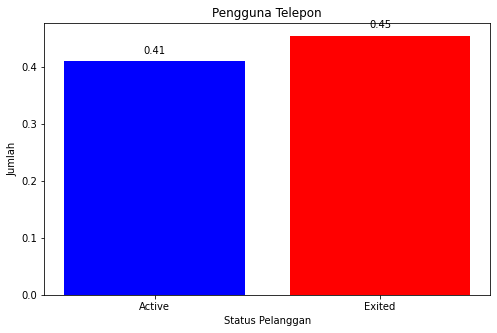

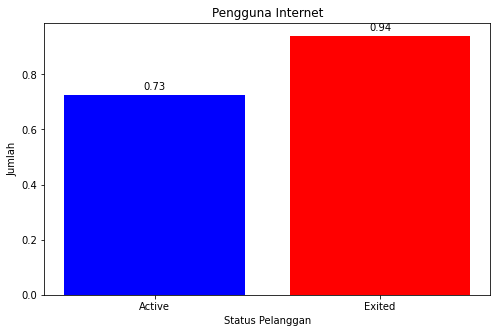

In [21]:
# Plotting

# Pengguna Telepon
plt.figure(figsize=(8, 5))
bars = plt.bar(['Active', 'Exited'], [telephone_user_share_active, telephone_user_share_exited], color=['b','r'])
plt.title('Pengguna Telepon')
plt.xlabel('Status Pelanggan')
plt.ylabel('Jumlah')

# Menambahkan angka
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()

# Pengguna Internet
plt.figure(figsize=(8, 5))
bars = plt.bar(['Active', 'Exited'], [internet_user_share_active, internet_user_share_exited], color=['b','r'])
plt.title('Pengguna Internet')
plt.xlabel('Status Pelanggan')
plt.ylabel('Jumlah')

# Menambahkan angka
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()

Berdasarkan analisis yang telah dilakukan, dapat disimpulkan sebagai berikut:

1. Pengguna Telepon: 
    - Dari pelanggan yang masih aktif, sekitar 41% adalah pengguna telepon.
    - Sementara itu, dari pelanggan yang telah berhenti, sekitar 45% adalah pengguna telepon.
    
    Meskipun perbedaannya tidak signifikan, ini menunjukkan bahwa pelanggan yang berhenti cenderung lebih sering menggunakan layanan telepon.

2. Pengguna Internet: 
    - Dari pelanggan yang masih aktif, sekitar 73% adalah pengguna internet.
    - Sementara itu, dari pelanggan yang telah berhenti, sekitar 94% adalah pengguna internet.
    
    Ini menunjukkan bahwa pelanggan yang berhenti memiliki kecenderungan yang jauh lebih besar untuk menggunakan layanan internet dibandingkan dengan pelanggan yang masih aktif. 

Sebagai langkah penanganan, perusahaan bisa melakukan evaluasi lebih lanjut terkait layanan telepon dan internet yang disediakan. Misalnya, mencari tahu apa masalah yang paling sering dihadapi oleh pengguna layanan tersebut atau apakah ada fitur tertentu yang membuat mereka tidak puas. Dengan begitu, perusahaan bisa mengambil langkah-langkah konkret untuk meningkatkan kualitas layanan dan mencegah lebih banyak pelanggan untuk berhenti.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Jenis pembayaran apa dan metode pembayaran apa yang unik untuk pelanggan Interconnect?

In [22]:
unique_payment_type_count = (telecom_df['type'].value_counts() / telecom_df['type'].value_counts().sum() * 100).tolist()   

# jenis pembayaran unik
unique_payment_type = telecom_df['type'].value_counts().reset_index().rename(columns={'index': 'type', 'type': 'unique count'})
unique_payment_type['percentage split (%)'] = ['{:.2f}'.format(x) for x in unique_payment_type_count]
unique_payment_type


,type,unique count,percentage split (%)
0,Month-to-month,3875,55.02
1,Two year,1695,24.07
2,One year,1473,20.91


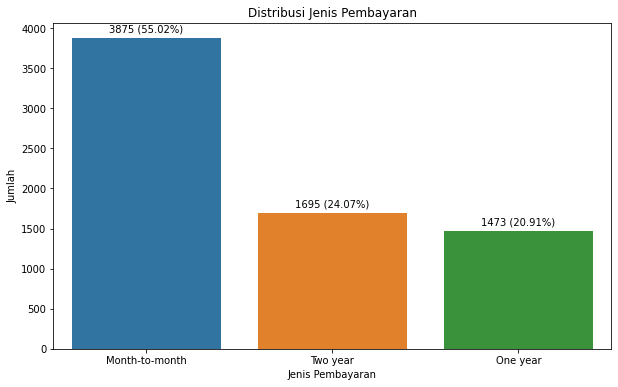

In [23]:
# Mengubah 'percentage split (%)' menjadi float
unique_payment_type['percentage split (%)'] = unique_payment_type['percentage split (%)'].astype(float)

plt.figure(figsize=(10,6))
bar = sns.barplot(x='type', y='unique count', data=unique_payment_type)
plt.title('Distribusi Jenis Pembayaran')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Jumlah')

# Menambahkan label nilai dan persentase pada setiap bar
for idx, p in enumerate(bar.patches):
    bar.annotate('{} ({:.2f}%)'.format(unique_payment_type['unique count'][idx], unique_payment_type['percentage split (%)'][idx]), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

Kesimpulan:

Berdasarkan data yang ditampilkan, sebagian besar pelanggan Interconnect (55.02%) lebih memilih untuk melakukan pembayaran dari bulan ke bulan. Sebaliknya, hanya sebagian kecil dari pelanggan yang memilih untuk melakukan pembayaran dalam jangka waktu dua tahun (24.07%) atau satu tahun (20.91%).

Saran:

Mengingat mayoritas pelanggan lebih memilih untuk melakukan pembayaran dari bulan ke bulan, Interconnect mungkin perlu melihat lebih dekat ke dalam model penagihan ini. Misalnya, mungkin ada peluang untuk memberikan insentif atau penawaran khusus kepada pelanggan yang memilih untuk melakukan pembayaran bulanan. Ini bisa dalam bentuk diskon, penawaran khusus, atau manfaat lain yang mungkin menarik bagi pelanggan.

Sebaliknya, untuk pelanggan yang memilih untuk melakukan pembayaran dalam jangka waktu satu atau dua tahun, Interconnect mungkin perlu mencari cara untuk membuat opsi ini lebih menarik. Ini bisa berarti memberikan lebih banyak insentif untuk memilih opsi ini, atau mungkin memberikan informasi yang lebih baik tentang manfaat melakukan pembayaran dalam jangka panjang.

Secara keseluruhan, tujuannya adalah untuk meningkatkan kepuasan pelanggan dan retensi, sambil juga berusaha untuk meningkatkan pendapatan dari pembayaran pelanggan.

In [24]:
unique_payment_method_count = (telecom_df['payment_method'].value_counts() / telecom_df['payment_method'].value_counts().sum() * 100).tolist()

# metode pembayaran unik
unique_payment_method = telecom_df['payment_method'].value_counts().reset_index().rename(columns={'index': 'payment method', 'payment_method': 'count'})
unique_payment_method['% payment split'] = ['{:.2f}'.format(x) for x in unique_payment_method_count]
unique_payment_method

,payment method,count,% payment split
0,Electronic check,2365,33.58
1,Mailed check,1612,22.89
2,Bank transfer (automatic),1544,21.92
3,Credit card (automatic),1522,21.61


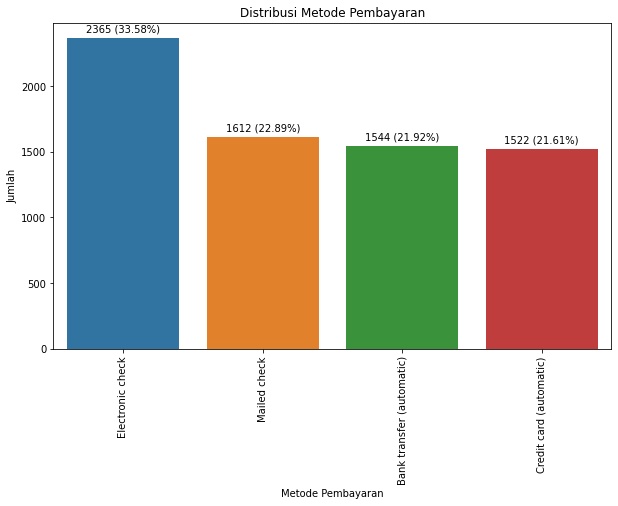

In [25]:
# Mengubah '% payment split' menjadi float
unique_payment_method['% payment split'] = unique_payment_method['% payment split'].astype(float)

plt.figure(figsize=(10,6))
bar = sns.barplot(x='payment method', y='count', data=unique_payment_method)
plt.title('Distribusi Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah')

# Menambahkan label nilai dan persentase pada setiap bar
for idx, p in enumerate(bar.patches):
    bar.annotate('{} ({:.2f}%)'.format(unique_payment_method['count'][idx], unique_payment_method['% payment split'][idx]), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xticks(rotation=90)  # Memutar label sumbu x agar mudah dibaca
plt.show()

Kesimpulan:

Berdasarkan analisis di atas, kita dapat melihat bahwa sebagian besar pelanggan Interconnect lebih memilih pembayaran bulanan dengan 33% dari total pembayaran dilakukan dengan metode ini. Selain itu, cek elektronik merupakan metode pembayaran yang paling sering digunakan di antara semua metode pembayaran yang tersedia.

Saran:

Melihat preferensi yang kuat terhadap pembayaran bulanan dan penggunaan cek elektronik, Interconnect dapat merumuskan strategi pemasaran yang memanfaatkan preferensi ini. Misalnya, mereka dapat menawarkan insentif atau penawaran khusus kepada pelanggan yang memilih untuk membayar bulanan atau menggunakan cek elektronik, yang dapat mendorong retensi pelanggan dan meningkatkan kepuasan pelanggan.

Selain itu, Interconnect juga dapat mempertimbangkan untuk melakukan penelitian lebih lanjut untuk memahami mengapa metode pembayaran ini begitu populer dan menggunakan temuan tersebut untuk meningkatkan atau menyesuaikan metode pembayaran lainnya. Misalnya, jika kenyamanan atau kecepatan adalah faktor kunci dalam popularitas cek elektronik, mungkin mereka dapat mencoba untuk menjadikan metode pembayaran lainnya lebih nyaman atau cepat.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Bisakah kita menyimpulkan hubungan antara metode pembayaran dan total biaya?

In [26]:
# total biaya dikelompokkan berdasarkan metode pembayaran
total_charges_grouped = telecom_df.groupby('payment_method', as_index=False).agg({'total_charges': 'sum'}).sort_values(
    by='total_charges', ascending=False, ignore_index=True)
total_charges_grouped

,payment_method,total_charges
0,Electronic check,4944903.50
1,Bank transfer (automatic),4748280.00
2,Credit card (automatic),4671593.50
3,Mailed check,1691392.25


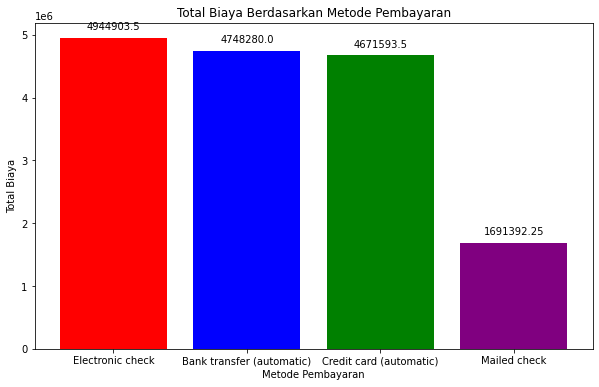

In [27]:
# Set ukuran figure
plt.figure(figsize=(10,6))

# Buat bar plot dan simpan ke dalam variabel
bars = plt.bar(total_charges_grouped['payment_method'], total_charges_grouped['total_charges'], color=['red', 'blue', 'green', 'purple'])

# Set judul dan label
plt.title('Total Biaya Berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Total Biaya')

# Menambahkan angka di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100000, round(yval, 2), ha='center', va='bottom')

# Tampilkan plot
plt.show()

Kesimpulan:

Dari analisis data, kita dapat melihat bahwa metode pembayaran yang paling populer di antara pelanggan Interconnect adalah 'Cek Elektronik'. Selain itu, grup ini juga membayar biaya total tertinggi. Sebaliknya, pelanggan yang menggunakan metode 'Mailed Check' (cek yang dikirim melalui pos) memiliki total biaya terendah.

Saran:

Berdasarkan kesimpulan ini, departemen pemasaran Interconnect bisa mengambil beberapa tindakan strategis. Misalnya, mereka bisa mencoba menargetkan lebih banyak pelanggan untuk menggunakan metode 'Cek Elektronik' melalui kampanye pemasaran yang efektif. Ini bisa berarti memberikan insentif khusus atau penawaran khusus kepada pelanggan yang memilih metode pembayaran ini.

Sebaliknya, untuk pelanggan yang saat ini menggunakan 'Mailed Check', tim pemasaran dapat merancang kampanye yang dirancang untuk mendorong mereka beralih ke metode pembayaran lain, seperti 'Bank Transfer' atau 'Electronic Check'. Langkah ini dapat membantu meningkatkan pendapatan total Interconnect, mengingat bahwa grup pelanggan ini saat ini memiliki total biaya terendah.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Bisakah kita menyimpulkan hubungan antara jenis pembayaran dan total biaya bulanan?

In [28]:
# total biaya bulanan yang dikelompokkan berdasarkan jenis pembayaran
df_payment_type = (telecom_df.groupby('type', as_index=False)
     .agg({'monthly_charges': 'sum', 'total_charges': 'sum'})
     .sort_values(by='total_charges', ascending=False, ignore_index=True)
)

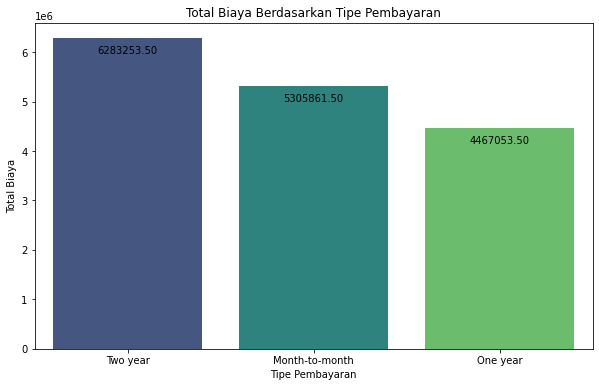

In [29]:
# Mengatur ukuran gambar
plt.figure(figsize=(10,6))

# Membuat plot bar
bar_plot = sns.barplot(x='type', y='total_charges', data=df_payment_type, palette='viridis')

# Menambahkan judul dan label
plt.xlabel('Tipe Pembayaran')
plt.ylabel('Total Biaya')
plt.title('Total Biaya Berdasarkan Tipe Pembayaran')

# Menampilkan nilai numerik di atas setiap bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      size=10,
                      xytext = (0, -12), 
                      textcoords = 'offset points')

plt.show()

Kesimpulan:

- Pelanggan Interconnect paling banyak menggunakan metode pembayaran 'Electronic Check' dan jenis pembayaran 'Month-to-Month'.
- Total biaya tertinggi diperoleh dari pelanggan dengan kontrak 'Two year'.

Saran:

- Interconnect bisa mendorong lebih banyak pelanggan untuk memilih kontrak jangka panjang seperti 'Two year' atau 'One year' dengan memberikan insentif atau penawaran khusus.
- Interconnect juga bisa menambahkan opsi pembayaran lain untuk memberikan lebih banyak fleksibilitas kepada pelanggan.

Jumlah layanan menurut jenis kontrak

In [30]:
# menghitung jumlah layanan berdasarkan tipe kontrak
df_service_count = (telecom_df.groupby('type', as_index=False)
     .agg({'service_count': 'sum'})
     .sort_values(by='service_count', ascending=False, ignore_index=True)
)
df_service_count

,type,service_count
0,Month-to-month,6013
1,Two year,4654
2,One year,3686


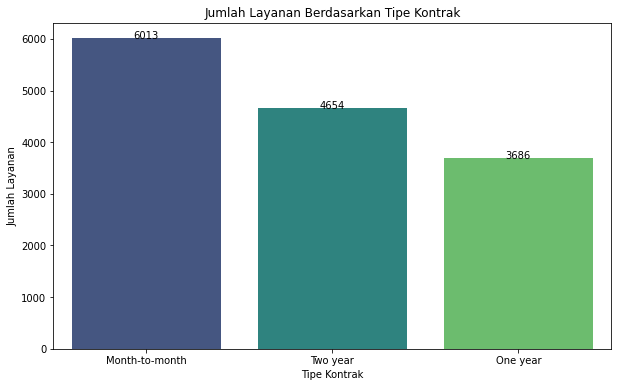

In [31]:
# membuat visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x='type', y='service_count', data=df_service_count, palette='viridis')

# menambahkan label nilai pada setiap bar
for i, row in df_service_count.iterrows():
    plt.text(i, row.service_count, round(row.service_count, 2), color='black', ha="center")

plt.xlabel('Tipe Kontrak')
plt.ylabel('Jumlah Layanan')
plt.title('Jumlah Layanan Berdasarkan Tipe Kontrak')
plt.show()

Kesimpulan:

Dari visualisasi data, kita dapat melihat jumlah layanan yang digunakan berdasarkan tipe kontrak. Dengan informasi ini, kita dapat melihat tipe kontrak mana yang paling banyak menggunakan layanan.

Saran:

Jika terdapat tipe kontrak yang jumlah layanannya lebih rendah, perusahaan mungkin perlu merancang strategi untuk mendorong pelanggan dengan tipe kontrak tersebut untuk menggunakan lebih banyak layanan. Ini bisa dalam bentuk promosi, diskon untuk layanan tambahan, atau paket layanan yang menarik.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Jenis kelamin apa yang memiliki total tagihan dan jumlah layanan terbanyak?

In [32]:
# total biaya yang dikelompokkan berdasarkan jenis kelamin
gender_charges = telecom_df.groupby('gender', as_index=False).agg({'total_charges': 'sum', 'service_count': 'sum'}).sort_values(by='total_charges', ascending=False, ignore_index=True)
change_datatype(gender_charges, ['total_charges'], 'int32')
gender_charges['persentase_total_biaya'] = gender_charges['total_charges'] / sum(gender_charges['total_charges']) * 100
gender_charges


,gender,total_charges,service_count,persentase_total_biaya
0,Male,8103814,7144,50.471657
1,Female,7952354,7209,49.528343


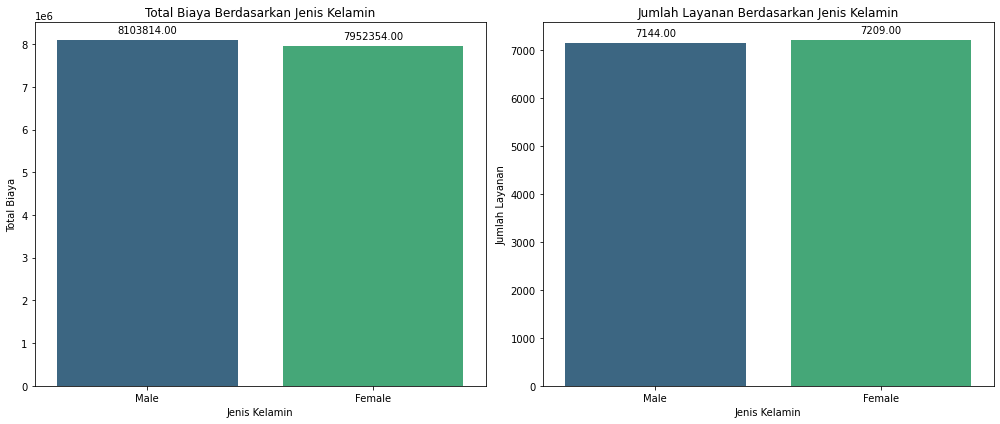

In [33]:
# Membuat visualisasi
fig, ax = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(x='gender', y='total_charges', data=gender_charges, ax=ax[0], palette='viridis')
ax[0].set_title('Total Biaya Berdasarkan Jenis Kelamin')
ax[0].set_xlabel('Jenis Kelamin')
ax[0].set_ylabel('Total Biaya')

# menambahkan label pada bar
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

sns.barplot(x='gender', y='service_count', data=gender_charges, ax=ax[1], palette='viridis')
ax[1].set_title('Jumlah Layanan Berdasarkan Jenis Kelamin')
ax[1].set_xlabel('Jenis Kelamin')
ax[1].set_ylabel('Jumlah Layanan')

# menambahkan label pada bar
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.tight_layout()
plt.show()

Kesimpulan:

Berdasarkan visualisasi, tampak bahwa total biaya dan jumlah layanan yang digunakan oleh pelanggan laki-laki dan perempuan hampir seimbang, dengan pelanggan laki-laki sedikit lebih banyak dalam hal total biaya, dan pelanggan perempuan sedikit lebih banyak dalam hal jumlah layanan.

Saran:

Dalam hal ini, tampaknya tidak perlu ada intervensi khusus berdasarkan jenis kelamin, karena kedua gender tampaknya sama-sama aktif dalam menggunakan layanan dan menghasilkan biaya. Namun, jika perusahaan ingin meningkatkan penggunaan layanan atau total biaya dari salah satu gender, mereka bisa mempertimbangkan untuk membuat paket layanan atau promosi yang lebih menarik bagi gender tersebut.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Bisakah jenis kontrak memengaruhi churn pelanggan?

In [34]:
# pengaruh jenis kontrak terhadap churn pelanggan
contract_type_percent = telecom_df.groupby(
    'type', as_index=False).agg(
    {'exited': 'sum'}).sort_values(
    by='exited', ascending=False, ignore_index=True)
contract_type_effect = (telecom_df['type'].value_counts() / telecom_df['type'].value_counts().sum() * 100).tolist()
contract_type_percent['% exit percent'] = ['{:.2f}'.format(x) for x in contract_type_effect]
contract_type_percent

,type,exited,% exit percent
0,Month-to-month,1655,55.02
1,One year,166,24.07
2,Two year,48,20.91


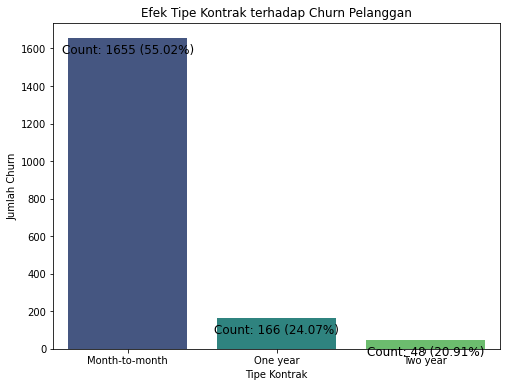

In [35]:
# membuat plot
plt.figure(figsize=(8,6))
bar = sns.barplot(x='type', y='exited', data=contract_type_percent, palette='viridis')

# menambahkan label jumlah dan persentase pada setiap bar
for idx, p in enumerate(bar.patches):
    bar.annotate('Count: {} ({}%)'.format(contract_type_percent['exited'][idx], contract_type_percent['% exit percent'][idx]), 
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xlabel('Tipe Kontrak')
plt.ylabel('Jumlah Churn')
plt.title('Efek Tipe Kontrak terhadap Churn Pelanggan')
plt.show()

Dari tabel di atas, dapat dilihat bahwa pelanggan yang memiliki kontrak dengan model "Bulan-ke-Bulan" (Month-to-month) memiliki tingkat churn (keluar) yang paling tinggi, yakni 1655 pelanggan atau sekitar 55.02% dari total pelanggan. Sementara itu, pelanggan dengan kontrak "Satu Tahun" (One year) memiliki tingkat churn sebesar 166 atau sekitar 24.07%, dan pelanggan dengan kontrak "Dua Tahun" (Two year) memiliki tingkat churn terendah, yakni hanya 48 atau sekitar 20.91%.

Kesimpulan yang dapat diambil adalah jenis kontrak mempengaruhi tingkat churn pelanggan. Pelanggan dengan kontrak jangka pendek (bulan-ke-bulan) lebih mungkin untuk churn dibandingkan dengan pelanggan dengan kontrak jangka panjang. Ini bisa disebabkan oleh fleksibilitas yang lebih besar dalam kontrak bulanan, memungkinkan pelanggan untuk berpindah ke penyedia layanan lain dengan lebih mudah.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Apa saja 5 layanan teratas yang ditawarkan?

In [36]:
# membuat salinan dari dataframe untuk digunakan dalam encoding
telecom_df_encode = telecom_df.copy()

# encoding layanan yang ditawarkan
online_security = {'online_security':{'Yes': 1, 'No': 0}}
online_backup = {'online_backup':{'Yes': 1, 'No': 0}}
device_protection = {'device_protection':{'Yes': 1, 'No': 0}}
tech_support = {'tech_support':{'Yes': 1, 'No': 0}}
streaming_tv = {'streaming_tv':{'Yes': 1, 'No': 0}}
streaming_movies = {'streaming_movies':{'Yes': 1, 'No': 0}}

telecom_df_encode.replace(online_security, inplace =True)
telecom_df_encode.replace(online_backup, inplace =True)
telecom_df_encode.replace(device_protection, inplace =True)
telecom_df_encode.replace(tech_support, inplace =True)
telecom_df_encode.replace(streaming_tv, inplace =True)
telecom_df_encode.replace(streaming_movies, inplace =True)

telecom_services_data = telecom_df_encode[['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'exited']]
telecom_services_data = telecom_services_data.transpose()
telecom_services_data

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
online_security,0,1,1,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,1
online_backup,1,0,1,0,0,0,1,0,0,1,...,0,1,0,1,0,0,1,0,0,0
device_protection,0,1,0,1,0,1,0,0,1,0,...,0,1,0,1,0,1,1,0,0,1
tech_support,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
streaming_tv,0,0,0,0,0,1,1,0,1,0,...,0,1,1,1,0,1,1,0,0,1
streaming_movies,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,1,0,0,1
exited,0,0,1,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [37]:
# mendapatkan dataframe yang menunjukkan layanan dan persentase hitungan
telecom_services_data['count'] = telecom_services_data.sum(axis=1)
telecom_services_df = telecom_services_data.reset_index(inplace=False)
telecom_services_df = telecom_services_df[['index', 'count']].rename(columns={'index': 'services'})
telecom_services_df['% service offered'] = telecom_services_df['count'] / telecom_services_df['count'].sum() * 100
telecom_services = telecom_services_df.copy()
telecom_services.sort_values('% service offered', axis = 0, ascending = False, inplace = True, ignore_index=True)
telecom_services

,services,count,% service offered
0,streaming_movies,2732,16.841327
1,streaming_tv,2707,16.687215
2,online_backup,2429,14.973493
3,device_protection,2422,14.930342
4,tech_support,2044,12.600173
5,online_security,2019,12.446061
6,exited,1869,11.521391


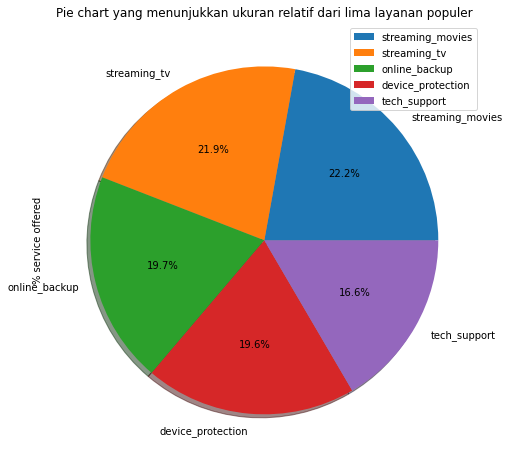

In [38]:
# plot top 5 layanan Interconnect berdasarkan hitungan
telecom_services_pie = telecom_services.head(5)
(telecom_services_pie.set_index('services').plot(y='% service offered', kind='pie',
title = 'Pie chart yang menunjukkan ukuran relatif dari lima layanan populer',
figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);


Dari data tersebut, kita dapat melihat bahwa layanan streaming (baik itu film atau TV) adalah layanan yang paling banyak digunakan oleh pelanggan Interconnect, dengan masing-masing memiliki 16,84% dan 16,69% dari total layanan yang ditawarkan. 

Selanjutnya, layanan backup online dan perlindungan perangkat juga cukup populer dengan masing-masing menyumbang sekitar 15% dari total layanan. Sedangkan layanan dukungan teknis dan keamanan online masing-masing memiliki sekitar 12,6% dan 12,45% dari total layanan.

Namun, yang menarik adalah bahwa hampir 11,52% dari pelanggan telah memilih untuk keluar atau berhenti menggunakan layanan (dalam hal ini diartikan sebagai "churn"). Ini adalah angka yang cukup signifikan dan menunjukkan bahwa Interconnect mungkin perlu melakukan lebih banyak upaya untuk mempertahankan pelanggan mereka.

Secara keseluruhan, data ini memberikan wawasan penting tentang layanan mana yang paling dihargai oleh pelanggan Interconnect, serta area mana yang mungkin perlu perbaikan untuk mengurangi angka churn.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Bisakah jumlah layanan yang ditawarkan memengaruhi churn pelanggan?

In [39]:
# Menghitung churn terhadap banyaknya layanan
churn_by_service_count = telecom_df.groupby('service_count')['exited'].sum().reset_index()

# Menampilkan data
churn_by_service_count

,service_count,exited
0,0,475
1,1,442
2,2,370
3,3,306
4,4,190
5,5,71
6,6,15


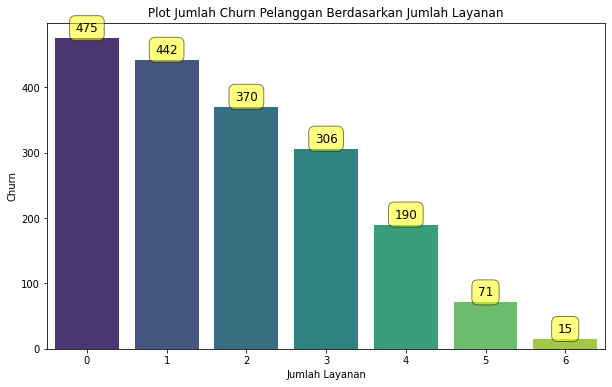

In [40]:
# Menggambar bar plot
plt.figure(figsize=(10,6))
ax = sns.barplot(x='service_count', y='exited', data=churn_by_service_count, palette='viridis')

# Menambahkan label pada setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points', 
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),  # menambahkan kotak di sekitar teks
                fontsize=12,  # ukuran font teks
                color='black',  # warna font teks
                )

plt.title('Plot Jumlah Churn Pelanggan Berdasarkan Jumlah Layanan')
plt.xlabel('Jumlah Layanan')
plt.ylabel('Churn')
plt.show()


Berdasarkan data yang ditampilkan, terlihat bahwa semakin banyak layanan yang digunakan oleh pelanggan, semakin kecil peluang pelanggan tersebut untuk melakukan churn. 

Pada pelanggan yang tidak menggunakan layanan sama sekali (service_count = 0), jumlah churn mencapai 475 pelanggan, ini merupakan jumlah tertinggi di antara semua kelompok. 

Sebaliknya, pada kelompok pelanggan yang menggunakan 6 layanan (service_count = 6), jumlah churn sangat rendah, yaitu hanya 15 pelanggan.

Ini menunjukkan bahwa pelanggan yang menggunakan lebih banyak layanan cenderung lebih puas dan lebih jarang melakukan churn. Oleh karena itu, perusahaan mungkin perlu mempertimbangkan strategi untuk mendorong pelanggan menggunakan lebih banyak layanan, seperti penawaran bundel layanan atau diskon untuk pelanggan yang menggunakan banyak layanan.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Bagaimana dengan efek hari dalam seminggu pada churn pelanggan?

In [41]:
# Menghitung jumlah churn untuk setiap hari dalam seminggu
churn_per_day = telecom_df.groupby('dayofweek')['exited'].sum().sort_values(ascending=False)
churn_per_day

dayofweek
Sunday       395
Friday       345
Tuesday      276
Monday       230
Saturday     224
Thursday     219
Wednesday    180
Name: exited, dtype: int32

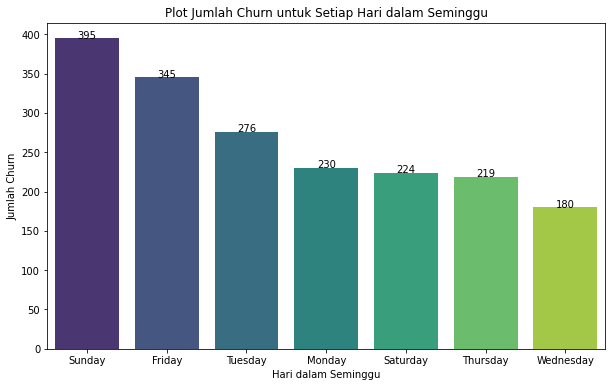

In [42]:
# Mengatur ukuran plot
plt.figure(figsize=(10,6))

# Membuat bar plot
ax = sns.barplot(x=churn_per_day.index, y=churn_per_day.values, palette='viridis')

# Menambahkan label pada setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height, 
            s = '{:.0f}'.format(height), 
            ha = 'center') 

# Memberi judul dan label sumbu
plt.title('Plot Jumlah Churn untuk Setiap Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Churn')

# Menampilkan plot
plt.show()

Kita dapat melihat bahwa churn paling banyak terjadi pada akhir pekan. Dengan pengetahuan ini, telekomunikasi Interkoneksi dapat memperkenalkan insentif dan bonus layanan akhir pekan untuk memastikan pelanggan tidak memutuskan layanan mereka selama akhir pekan.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Bulan apa yang paling banyak mengalami churn dan bagaimana cara mencegahnya?

In [43]:
churn_per_month = telecom_df.groupby('month')['exited'].sum().sort_values(ascending=False)
churn_per_month

month
September    257
November     224
October      212
December     204
August       151
July         142
June         132
May          126
February     122
March        107
April         98
January       94
Name: exited, dtype: int32

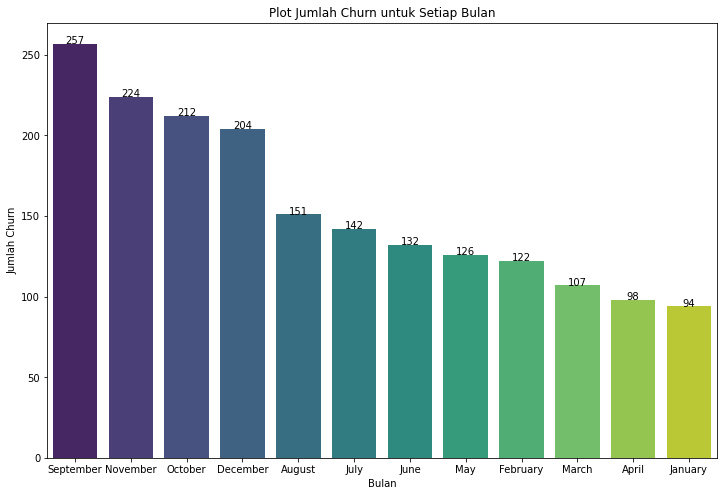

In [44]:
# Mengatur ukuran plot
plt.figure(figsize=(12,8))

# Membuat bar plot
ax = sns.barplot(x=churn_per_month.index, y=churn_per_month.values, palette='viridis')

# Menambahkan label pada setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height, 
            s = '{:.0f}'.format(height), 
            ha = 'center') 

# Memberi judul dan label sumbu
plt.title('Plot Jumlah Churn untuk Setiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Churn')

# Menampilkan plot
plt.show()


Dari data di atas, kita bisa melihat bahwa churn pelanggan paling banyak terjadi pada bulan September, November, dan Oktober. Hal ini bisa disebabkan oleh berbagai faktor, mungkin terkait dengan kondisi pasar pada bulan-bulan tersebut, atau ada kebijakan perusahaan yang kurang disukai pelanggan pada periode tersebut.

### Kesimpulan 

Berikut adalah beberapa simpulan dan rekomendasi berdasarkan analisis data yang telah dilakukan:

1. **Preferensi Pembayaran**: Mayoritas pelanggan Interconnect lebih memilih pembayaran bulanan dengan 55.2% dari pembayaran dilakukan dengan metode ini. Oleh karena itu, Interconnect dapat terus mempertahankan dan memperluas opsi pembayaran bulanan mereka.

2. **Metode Pembayaran**: Pembayaran yang dilakukan dengan cek elektronik memiliki total tagihan tertinggi dan oleh karena itu akan membawa pendapatan terbanyak. Interconnect mungkin perlu mempertimbangkan untuk mendorong metode pembayaran ini kepada pelanggan mereka, mungkin dengan menawarkan insentif atau diskon bagi mereka yang menggunakan cek elektronik.

3. **Jenis Kontrak**: Pelanggan dengan kontrak dua tahun menghasilkan total tagihan tertinggi dan pendapatan total lebih banyak dibandingkan dengan pelanggan dengan kontrak satu tahun. Untuk memaksimalkan pendapatan, Interconnect dapat menargetkan lebih banyak pelanggan untuk mendaftar kontrak dua tahun.

4. **Churn dan Jenis Kontrak**: Pelanggan dengan kontrak dua tahun memiliki tingkat churn lebih rendah dibandingkan dengan jenis kontrak lainnya. Ini menunjukkan bahwa kontrak jangka panjang dapat membantu dalam mempertahankan pelanggan dan mengurangi churn. Interconnect mungkin perlu meninjau strategi mereka untuk mendorong lebih banyak pelanggan untuk mendaftar kontrak dua tahun.

5. **Churn dan Jumlah Layanan**: Pelanggan yang menggunakan lebih dari 5 layanan sekaligus memiliki tingkat churn yang lebih rendah. Mendorong penggunaan layanan tambahan dapat menjadi strategi efektif untuk mempertahankan pelanggan dan mengurangi churn.

6. **Churn dan Waktu**: Churn paling banyak terjadi pada akhir pekan. Interconnect mungkin perlu meninjau strategi layanan pelanggan mereka selama akhir pekan dan memastikan bahwa mereka memiliki sumber daya yang cukup untuk melayani pelanggan dan mencegah churn.

Berdasarkan simpulan ini, berikut adalah rekomendasi tindakan:

1. **Rencana Dua Tahun**: Perkenalkan lebih banyak opsi rencana kontrak dua tahun untuk menarik lebih banyak pelanggan.

2. **Promosi**: Lakukan kampanye pemasaran dan acara promosi untuk mempromosikan rencana dua tahun.

3. **Pembayaran Cek Elektronik**: Dorong pelanggan untuk melakukan pembayaran menggunakan cek elektronik, mungkin dengan menawarkan insentif atau diskon.

4. **Layanan Tambahan**: Berikan insentif untuk pelanggan yang menggunakan lebih dari 5 layanan sekaligus, seperti diskon atau layanan premium.

5. **Mencegah Churn**: Perkenalkan bonus, rencana layanan gratis, atau layanan streaming dengan diskon pada periode di mana tingkat churn cenderung tinggi, seperti akhir pekan.

Dengan mengimplementasikan tindakan ini, Interconnect dapat berpotensi mengurangi tingkat churn dan meningkatkan pendapatan mereka.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<a id='section4'></a>
## Proses Pemodelan
Di sini, kita akan melatih beberapa model. Kita akan melatih beberapa model  tree-based models, gradient-boosted model , dan eaf-based model. Metrik utama yang kita pilih untuk mengevaluasi model adalah AUC-ROC. Metrik sekunder adalah akurasi. AUC menghitung area di bawah kurva dan tujuannya adalah untuk memaksimalkan area ini. Akurasi memberi tahu kita seberapa sering klasifikasi benar dan tujuannya adalah untuk memaksimalkan akurasi.

### Rekayasa Fitur untuk Pembelajaran Mesin
Kami melakukan rekayasa fitur untuk mengkodekan semua fitur kategorikal menjadi numerik. Pengkodean fitur membuat mereka berguna untuk pembelajaran mesin. Kami akan menerapkan one-hot encoding, target encoding, dan ordinal encoding tergantung pada algoritma pembelajaran mesin. Ringkasan hasil ditunjukkan di bawah.

In [45]:
# Membuat DataFrame
model_info = pd.DataFrame({
    'Jenis Model': ['Statistical based', 'Tree-based','Tree-based', 'Gradient-boosted', 'Gradient-boosted', 'Gradient-boosted'],
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Catboost', 'XGBoost', 'LightGBM'],
    'Jenis Pengkodean': ['One-hot encoding', 'label encoding', 'label encoding', 'Tanpa pengkodean', 'One-hot encoding', 'Ordinal encoding'],
    'Highlight': ['Kurang rentan terhadap overfitting', 'Normalisasi atau penskalaan data tidak diperlukan', 'Kekuatan prediktif yang sangat baik', 'Dapat menangani data kategorikal dengan baik', 'Performa dan eksekusi model yang baik', 'Sangat cepat'],
    'Kekurangan / Kelebihan': ['Dapat overfit di dataset berdimensi tinggi', 'Cenderung overfitting', 'Cenderung overfitting', 'Perlu membangun pohon keputusan dalam fitur dengan kardinalitas tinggi.', 'Tidak bisa menangani fitur kategorikal (perlu pengkodean)', 'Butuh pengkodean untuk fitur kategorikal']
})

model_info

,Jenis Model,Model,Jenis Pengkodean,Highlight,Kekurangan / Kelebihan
0,Statistical based,Logistic Regression,One-hot encoding,Kurang rentan terhadap overfitting,Dapat overfit di dataset berdimensi tinggi
1,Tree-based,Decision Tree,label encoding,Normalisasi atau penskalaan data tidak diperlukan,Cenderung overfitting
2,Tree-based,Random Forest,label encoding,Kekuatan prediktif yang sangat baik,Cenderung overfitting
3,Gradient-boosted,Catboost,Tanpa pengkodean,Dapat menangani data kategorikal dengan baik,Perlu membangun pohon keputusan dalam fitur de...
4,Gradient-boosted,XGBoost,One-hot encoding,Performa dan eksekusi model yang baik,Tidak bisa menangani fitur kategorikal (perlu ...
5,Gradient-boosted,LightGBM,Ordinal encoding,Sangat cepat,Butuh pengkodean untuk fitur kategorikal


Untuk model berbasis pohon seperti decision tree dan random forest, kami menggunakan pengkodean label. Untuk regresi logistik dan XGBoost, kami menggunakan pengkodean satu-hot. XGBoost adalah algoritma Pembelajaran Mesin berbasis ansambel pohon keputusan yang menggunakan kerangka kerja peningkatan gradien. Regresor CatBoost memiliki implementasi sendiri untuk pengkodean fitur kategorikal. Dalam hal ini, kami membuat dataset terpisah tanpa pengkodean apa pun. Secara internal, catboost mengkodekan fitur kategorikal. Karena pengkodean satu-hot tidak optimal untuk LightGBM karena melakukan pengkodean sendiri untuk fitur kategorikal, kami menerapkan OrdinalEncoder pada fitur kategorikal LightGBM.

In [46]:
# menghapus fitur yang tidak penting
df = telecom_df.drop(['customer_id', 'begin_date', 'end_date', 'end_date_value', 'dayofweek', 'month', 'year'], axis=1)

# mendeklarasikan variabel untuk target dan fitur
y = df.exited
X = df.drop(['exited'], axis=1)

# membagi data menjadi 75% pelatihan dan 25% pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

In [47]:
# membuat salinan dari dataset fitur yang sudah dipisah
features_train = X_train.copy()
features_test = X_test.copy()

# memilih kolom numerik
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'int32', 'float32']]

# daftar variabel kategorikal
s = (features_train.dtypes == 'object')
object_cols = list(s[s].index)
print('Variabel kategorikal:')
print(object_cols)

Variabel kategorikal:
['type', 'paperless_billing', 'payment_method', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'gender', 'partner', 'dependents', 'multiple_lines']


In [48]:
# Enkoding fitur untuk pembelajaran mesin

# Pendekatan 1: Enkoding Ordinal
# buat salinan untuk menghindari perubahan data asli
label__X_train = features_train.copy()
label__X_test = features_test.copy()

# terapkan enkoder ordinal ke setiap kolom dengan data kategorikal
ordinal_encoder = OrdinalEncoder()
label__X_train[object_cols] = ordinal_encoder.fit_transform(features_train[object_cols])
label__X_test[object_cols] = ordinal_encoder.transform(features_test[object_cols])

# Pendekatan 2: Enkoding One-Hot
# enkoding one-hot dari fitur kategorikal
df_ohe = pd.get_dummies(df, drop_first=True)

# mendeklarasikan variabel untuk target dan fitur
y_ohe = df_ohe.exited
X_ohe = df_ohe.drop(['exited'], axis=1)

# membagi data menjadi 75% pelatihan dan 25% set pengujian
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, test_size=0.25, random_state=12345)

# fitur numerik
numerical_cols = [cname for cname in X_train_ohe.columns if X_train_ohe[cname].dtype in ['float32', 'float64', 'int64', 'int32']]

# penskalaan fitur
scaler = StandardScaler()
scaler.fit(X_train_ohe[numerical_cols])
# mengubah set pelatihan dan set pengujian menggunakan transform()
X_train_ohe[numerical_cols] = scaler.transform(X_train_ohe[numerical_cols])
X_test_ohe[numerical_cols]  = scaler.transform(X_test_ohe[numerical_cols])

Kami telah membagi data menjadi 75% untuk pelatihan dan 25% untuk pengujian. Kami telah menerapkan metode pengkodean ordinal dan one-hot encoding pada fitur-fitur yang ada. Kami juga telah melakukan penskalaan pada data setelah one-hot encoding menggunakan fungsi StandardScaler. Selanjutnya, kami akan mengevaluasi apakah ada ketidakseimbangan dalam kelas target dan jika perlu, kami akan melakukan teknik penyeimbangan untuk meningkatkan kualitas model.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Memeriksa keseimbangan kelas

In [49]:
# fungsi untuk menghitung metrik evaluasi model
def print_model_evaluation(y_test, test_predictions):
    print("\033[1m" + 'Skor F1: ' + "\033[0m", '{:.3f}'.format(f1_score(y_test, test_predictions)))
    print("\033[1m" + 'Skor Akurasi: ' + "\033[0m", '{:.2%}'.format(accuracy_score(y_test, test_predictions)))
    print("\033[1m" + 'Presisi: ' + "\033[0m", '{:.3f}'.format(precision_score(y_test, test_predictions)))
    print("\033[1m" + 'Recall: ' + "\033[0m", '{:.3f}'.format(recall_score(y_test, test_predictions)))
    print("\033[1m" + 'Skor Akurasi Seimbang: ' + "\033[0m", '{:.2%}'.format(balanced_accuracy_score(y_test, test_predictions)))
    print("\033[1m" + 'Skor AUC-ROC: ' + "\033[0m", '{:.2%}'.format(roc_auc_score(y_test, test_predictions)))
    print()
    print("\033[1m" + 'Matriks Konfusi' + "\033[0m")
    print('-'*50)
    print(confusion_matrix(y_test, test_predictions))
    print()
    print("\033[1m" + 'Laporan klasifikasi' + "\033[0m")
    print('-'*50)
    print(classification_report(y_test, test_predictions))
    print()


In [50]:
# fungsi untuk mengevaluasi model klasifikasi
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Baseline Model

In [51]:
#model baseline menggunakan klasifikasi dummy
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_train, y_train)
dummy_clf_test_predictions = dummy_clf.predict(features_test)

In [52]:
#evaluasi model baseline
print_model_evaluation(y_test, dummy_clf_test_predictions)

Skor F1:  0.000
Skor Akurasi:  73.08%
Presisi:  0.000
Recall:  0.000
Skor Akurasi Seimbang:  50.00%
Skor AUC-ROC:  50.00%

Matriks Konfusi
--------------------------------------------------
[[1287    0]
 [ 474    0]]

Laporan klasifikasi
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1287
           1       0.00      0.00      0.00       474

    accuracy                           0.73      1761
   macro avg       0.37      0.50      0.42      1761
weighted avg       0.53      0.73      0.62      1761




Model baseline memprediksi kelas yang paling sering muncul dalam hal ini "0". Dengan melihat laporan model baseline, kita dapat melihat bahwa akurasi rendah yaitu 73% dan skor AUC-ROC adalah 50%. Ini mewakili baseline sehingga kita seharusnya mengharapkan model kita untuk berkinerja lebih baik.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Sanity dengan Logistic regression

0    0.770585
1    0.229415
dtype: float64

Accuracy score sebelum upsampling: 0.827


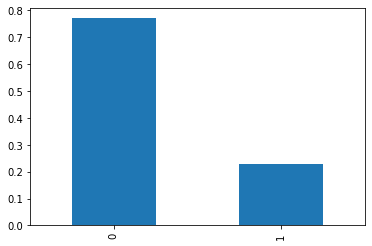

In [53]:
# sanity check
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(label__X_train, y_train) # melatih model 
test_predictions = pd.Series(model.predict(label__X_test))
class_frequency = test_predictions.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');
print()
print('Accuracy score sebelum upsampling: {:.3f}'.format(accuracy_score(y_test, test_predictions)))

Kami menilai keandalan model dengan memeriksa seberapa sering fitur target berisi kelas "1" atau "0". Kami dapat mengamati ketidakseimbangan kelas dalam set pengujian yang diprediksi. Selanjutnya kita mencoba untuk meningkatkan kualitas model menggunakan pendekatan upsampling untuk memperbaiki ketidakseimbangan kelas.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Upsampling untuk memperbaiki ketidakseimbangan kelas.

In [54]:
# function untuk menjalankan upsampling 
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )
    return features_upsampled, target_upsampled

#  membuat training baru
features_upsampled, target_upsampled = upsample(
    label__X_train, y_train, 5
)

0    0.504259
1    0.495741
dtype: float64

Accuracy score setelah upsampling: 0.719


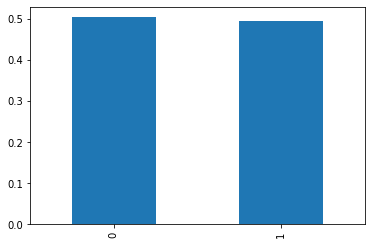

In [55]:
# sanity check setelah upsampling
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled) #melatih model  
test_predictions = pd.Series(model.predict(label__X_test))
class_frequency = test_predictions.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');
print()
print('Accuracy score setelah upsampling: {:.3f}'.format(accuracy_score(y_test, test_predictions)))

Menggunakan teknik upsampling, kami telah dapat menyelesaikan masalah ketidakseimbangan kelas. Kelas telah seimbang meskipun akurasi model tidak meningkat.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Membuat dictionary untuk menyimpan hasil

In [137]:
# Membuat dictionary untuk menyimpan hasil
results = {
    "Models": [],
    "Hyperparameter tuning time": [],
    "Training time": [],
    "Prediction time (train)": [],
    "AUC-ROC score (train)": [],
    "Accuracy score (train)": [],
    "Prediction time (test)": [],
    "AUC-ROC score (test)": [],
    "Accuracy score (test)": []
}

def evaluate_model(name, model, params, X_train, y_train, X_test, y_test):
    # Hyperparameter tuning dan menghitung waktu
    start_time = time.time()
    model_cv = GridSearchCV(model, param_grid=params, cv=5, scoring='roc_auc')
    model_cv.fit(X_train, y_train)
    tuning_time = time.time() - start_time

    # Dapatkan model terbaik
    model_best = model_cv.best_estimator_

    # Training dan menghitung waktu
    start_time = time.time()
    model_best.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Prediksi dan menghitung waktu pada data training
    start_time = time.time()
    pred_train = model_best.predict(X_train)
    pred_proba_train = model_best.predict_proba(X_train)[:, 1]
    prediction_time_train = time.time() - start_time

    # Prediksi dan menghitung waktu pada data uji
    start_time = time.time()
    pred_test = model_best.predict(X_test)
    pred_proba_test = model_best.predict_proba(X_test)[:, 1]
    prediction_time_test = time.time() - start_time

    # Menghitung skor pada data training
    auc_roc_score_train = roc_auc_score(y_train, pred_proba_train)
    accuracy_score_train = accuracy_score(y_train, pred_train)

    # Menghitung skor pada data uji
    auc_roc_score_test = roc_auc_score(y_test, pred_proba_test)
    accuracy_score_test = accuracy_score(y_test, pred_test)

    # Menyimpan hasil
    results["Models"].append(name)
    results["Hyperparameter tuning time"].append(f"{tuning_time:.2f} s")
    results["Training time"].append(f"{training_time:.2f} s")
    results["Prediction time (train)"].append(f"{prediction_time_train:.2f} s")
    results["AUC-ROC score (train)"].append(f"{auc_roc_score_train * 100:.2f} %")
    results["Accuracy score (train)"].append(f"{accuracy_score_train * 100:.2f} %")
    results["Prediction time (test)"].append(f"{prediction_time_test:.2f} s")
    results["AUC-ROC score (test)"].append(f"{auc_roc_score_test * 100:.2f} %")
    results["Accuracy score (test)"].append(f"{accuracy_score_test * 100:.2f} %")


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<a id='section5'></a>
## Model Training

In [138]:
# fungsi untuk plot confusion matrix
def plot_confusion_matrix(y, y_predict):
    "Fungsi ini digunakan untuk memplot matriks kebingungan/confusion matrix"
    
    # menghitung confusion matrix
    cm = confusion_matrix(y, y_predict)
    
    # membuat plot
    fig, ax = plt.subplots(figsize=(6,6))
    
    # menggunakan heatmap dari seaborn
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax = ax)
    
    # memberi label sumbu
    ax.set_xlabel('Label Prediksi')
    ax.set_ylabel('Label Sebenarnya')
    
    # memberi judul
    ax.set_title('Confusion Matrix')
    
    # memberi label untuk kelas
    ax.xaxis.set_ticklabels(['Tidak Churn', 'Churn'])
    ax.yaxis.set_ticklabels(['Tidak Churn', 'Churn'])
    
    # menampilkan jumlah sampel di setiap kelas pada confusion matrix
    for i in range(2):
        for j in range(2):
            ax.text(j+0.5,i+0.5,cm[i,j],
                    ha='center',va='center',color='red')

    plt.show()


In [139]:
# Melakukan proses upsampling pada dataset yang telah dikodekan dengan label (label__X_train, y_train)
label__X_train_upsampled, y_train_upsampled = upsample(
    label__X_train, y_train, 5
)

# Melakukan proses upsampling pada dataset yang telah diubah dengan one-hot encoding (X_train_ohe, y_train_ohe)
X_train_ohe_upsampled, y_train_ohe_upsampled = upsample(
    X_train_ohe, y_train_ohe, 5
)

# Melakukan proses upsampling pada dataset latihan awal (X_train, y_train)
X_train_upsampled, y_train_upsampled = upsample(
    X_train, y_train, 5
)

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Logistic Regression

In [140]:
%%time

# Mendefinisikan hyperparameter yang akan dituning 
grid_logreg = {
    "C": [0.01, 0.1, 1],
    'penalty': ['l2'], # l1 lasso l2 ridge
    'solver': ['lbfgs']
}

# Mendefinisikan model
logreg_clf = LogisticRegression(random_state = 12345)
# Mendefinisikan objek pencarian grid
grid_search_logreg = GridSearchCV(
    estimator = logreg_clf,
    param_grid = grid_logreg,
    scoring = 'roc_auc',
    cv = 10
)
# Melakukan pencarian
logreg_cv = grid_search_logreg.fit(X_train_ohe, y_train_ohe)

# Menampilkan hasil
print('Hyperparameter terbaik adalah: {}'.format(logreg_cv.best_params_))


Hyperparameter terbaik adalah: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
CPU times: user 2.49 s, sys: 3.76 s, total: 6.25 s
Wall time: 6.26 s


In [141]:
#%%time

# Mendefinisikan hyperparameter yang akan dituning 
grid_logreg = {
    "C": [0.01, 0.1, 1],
    'penalty': ['l2'], # l1 lasso l2 ridge
    'solver': ['lbfgs']
}

# Mendefinisikan model
logreg_clf = LogisticRegression(random_state = 12345)
# Mendefinisikan objek pencarian grid
grid_search_logreg = GridSearchCV(
    estimator = logreg_clf,
    param_grid = grid_logreg,
    scoring = 'roc_auc',
    cv = 10
)
# Melakukan pencarian
logreg_cv = grid_search_logreg.fit(X_train_ohe, y_train_ohe)

# Menampilkan hasil
print('Hyperparameter terbaik adalah: {}'.format(logreg_cv.best_params_))


In [142]:
%%time
# melatih logistic regression classifier 
train_logistic_regression_classifier(X_train_ohe, y_train_ohe)

CPU times: user 91.9 ms, sys: 146 ms, total: 237 ms
Wall time: 210 ms


Skor AUC-ROC dan Akurasi menggunakan Klasifikasi Regresi Logistik : 
Skor AUC-ROC: 88.30%
Skor Akurasi: 83.30%



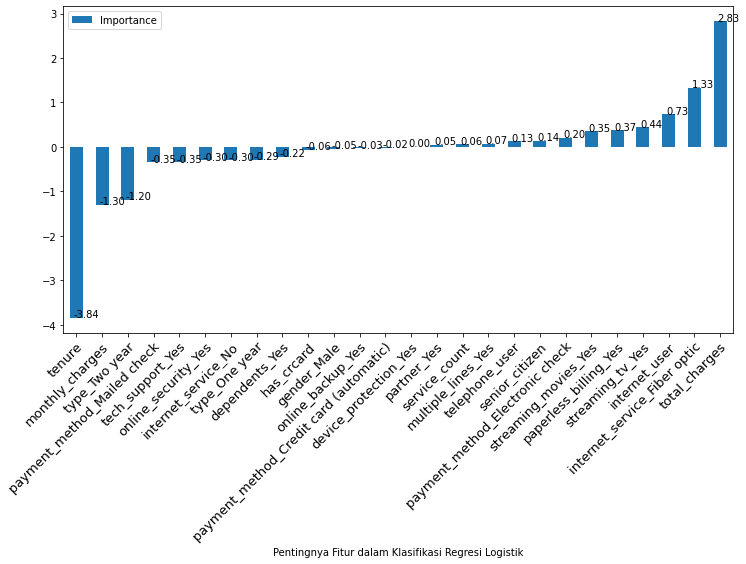

CPU times: user 612 ms, sys: 174 ms, total: 786 ms
Wall time: 823 ms


In [143]:
%%time
# Membuat prediksi dengan klasifikasi regresi logistik untuk data uji
logistic_regression_classifier_prediction(X_test_ohe, y_test_ohe)

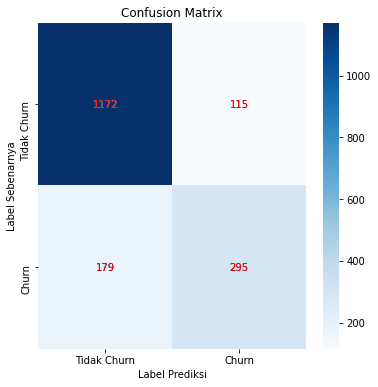

In [144]:
# plot confusion matrix
plot_confusion_matrix(y_test, logreg_pred)

#### input hasil prediksi model ke Dataframe

In [145]:
logreg_cv_params = logreg_cv.best_params_
# Mengubah setiap value menjadi list
logreg_cv_params = {k: [v] for k, v in logreg_cv_params.items()}

# otomatisasi skor agar skor masuk ke dalam result dataframe
evaluate_model('Logistic Regression', logreg_clf, logreg_cv_params, X_train_ohe, y_train_ohe, X_test_ohe, y_test_ohe)

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Decision Tree Classifier

In [146]:
%%time
# Optimasi hyperparameter untuk klasifikasi pohon keputusan

# Mendefinisikan hyperparameter yang akan diuji
grid_dt = {
    "criterion" : ["gini", "entropy"], # kriteria untuk split
    "max_depth" : [None, 2, 4, 8, 10, 12], # kedalaman maksimum pohon
    "min_samples_split" : [2, 4, 8, 16], # jumlah minimum sampel untuk split simpul internal
    "min_samples_leaf" : [2, 4, 6] # jumlah minimum sampel untuk simpul daun
}
# Mendefinisikan model
dt_clf = DecisionTreeClassifier(random_state = 12345)

# Mendefinisikan objek grid search
grid_search_dt = GridSearchCV(estimator=dt_clf, param_grid = grid_dt, cv=5, scoring = 'roc_auc')

# Melakukan pencarian hyperparameter optimal
dt_cv = grid_search_dt.fit(label__X_train, y_train)

# Menampilkan hasil pencarian hyperparameter optimal
print('Hyperparameter terbaik adalah: {}'.format(dt_cv.best_params_))

Hyperparameter terbaik adalah: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 16}
CPU times: user 18.6 s, sys: 89.6 ms, total: 18.6 s
Wall time: 18.7 s


In [147]:
# fungsi untuk melatih model dan membuat prediksi
def train_decision_tree_classifier(X_train, y_train):
    """Fungsi ini melatih model klasifikasi pohon keputusan"""
    global dt_model
    # membangun model
    dt_model = DecisionTreeClassifier(**grid_search_dt.best_params_)
    dt_model.fit(X_train, y_train) # melatih model 
    
def decision_tree_classifier_prediction(X_test, y_test):
    """"
    Fungsi ini digunakan untuk membuat prediksi 
    menggunakan model klasifikasi pohon keputusan
    """
    global dt_pred, dt_pred_proba
    dt_pred = dt_model.predict(X_test)
    dt_pred_proba = dt_model.predict_proba(X_test)[:, 1]
    
    # menentukan skor AUC-ROC
    print("\033[1m" + 'Skor AUC-ROC dan Akurasi menggunakan Klasifikasi Pohon Keputusan: ' + "\033[0m")
    print('Skor AUC-ROC: {:.2%}'.format(roc_auc_score(y_test, dt_pred_proba)))
    
    # menentukan akurasi untuk klasifikasi pohon keputusan
    dt_accuracy = accuracy_score(y_test, dt_pred)
    print('Akurasi: {:.2%}'.format(dt_accuracy))
    print()
    
    # pentingnya fitur dari klasifikasi pohon keputusan
    sorted_feature_importance = dt_model.feature_importances_.argsort()
    plt.figure(figsize=(8,6))
    plt.barh(label__X_train.columns[sorted_feature_importance], 
             dt_model.feature_importances_[sorted_feature_importance], 
             color='turquoise')
    plt.xlabel("Pentingnya Fitur dari Klasifikasi Pohon Keputusan")

In [148]:
%%time
# train decision tree classifier
train_decision_tree_classifier(label__X_train, y_train)

CPU times: user 30.8 ms, sys: 0 ns, total: 30.8 ms
Wall time: 42.7 ms


Skor AUC-ROC dan Akurasi menggunakan Klasifikasi Pohon Keputusan: 
Skor AUC-ROC: 87.66%
Akurasi: 84.61%

CPU times: user 45.2 ms, sys: 13 µs, total: 45.2 ms
Wall time: 42.9 ms


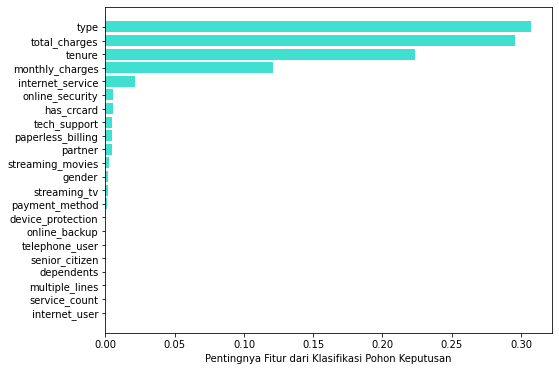

In [149]:
%%time
# Membuat prediksi dengan klasifikasi decision tree classifier untuk data uji 
decision_tree_classifier_prediction(label__X_test, y_test)

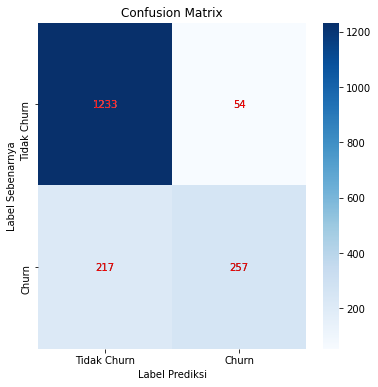

In [150]:
# plot confusion matrix
plot_confusion_matrix(y_test, dt_pred)

#### input hasil prediksi model ke Dataframe

In [151]:
dt_cv_params = dt_cv.best_params_
# Mengubah setiap value menjadi list
dt_cv_params = {k: [v] for k, v in dt_cv_params.items()}

# otomatisasi skor agar skor masuk ke dalam result dataframe
evaluate_model('Decision Tree Classifier', dt_clf, dt_cv_params, label__X_train, y_train, label__X_test, y_test)

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Random Forest Classifier

In [152]:
%%time
# Optimasi hiperparameter

# Menentukan hiperparameter untuk diubah
grid_rf = {
    "criterion" : ["gini", "entropy"],
    "n_estimators" : [10, 25, 50, 100],
    "max_depth" : [None, 2, 4, 8, 10, 12],
    "min_samples_leaf" : [2, 4, 6]
}

# Mendefinisikan model
rf_clf = RandomForestClassifier(random_state = 12345)

# Mendefinisikan objek pencarian grid
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid = grid_rf, cv=5, scoring = 'roc_auc')

# Melakukan pencarian
rf_cv = grid_search_rf.fit(label__X_train, y_train)

# Menyimpulkan hasil
print('Hiperparameter terbaik adalah: {}'.format(rf_cv.best_params_))

Hiperparameter terbaik adalah: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 2, 'n_estimators': 100}
CPU times: user 2min 39s, sys: 566 ms, total: 2min 39s
Wall time: 2min 40s


In [153]:
# fungsi untuk melatih model dan membuat prediksi
def train_random_forest_classifier(X_train, y_train):
    """Fungsi ini melatih model hutan acak"""
    global rf_model
    # membangun model
    rf_model = RandomForestClassifier(**grid_search_rf.best_params_)
    rf_model.fit(X_train, y_train) # melatih model 
    
def random_forest_classifier_prediction(X_test, y_test):
    """
    Fungsi ini digunakan untuk membuat prediksi 
    menggunakan model klasifikasi hutan acak
    """
    global rf_pred, rf_pred_proba
    rf_pred = rf_model.predict(X_test)
    rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]
    # menentukan skor AUC-ROC
    print("\033[1m" + 'Skor AUC-ROC dan Akurasi menggunakan Klasifikasi Hutan Acak' + "\033[0m")
    print('Skor AUC-ROC: {:.2%}'.format(roc_auc_score(y_test, rf_pred_proba)))
    # menentukan akurasi untuk klasifikasi hutan acak
    rf_accuracy = accuracy_score(y_test, rf_pred)
    print('Skor Akurasi: {:.2%}'.format(rf_accuracy))
    print()
    # pentingnya fitur dari klasifikasi hutan acak
    sorted_feature_importance = rf_model.feature_importances_.argsort()
    plt.figure(figsize=(8,6))
    plt.barh(label__X_train.columns[sorted_feature_importance], 
             rf_model.feature_importances_[sorted_feature_importance], 
             color='turquoise')
    plt.xlabel("Pentingnya Fitur dari Klasifikasi Hutan Acak")

In [154]:
%%time
# train random forest classifier
train_random_forest_classifier(label__X_train, y_train)

CPU times: user 719 ms, sys: 0 ns, total: 719 ms
Wall time: 730 ms


Skor AUC-ROC dan Akurasi menggunakan Klasifikasi Hutan Acak
Skor AUC-ROC: 88.78%
Skor Akurasi: 83.99%

CPU times: user 147 ms, sys: 3.92 ms, total: 151 ms
Wall time: 159 ms


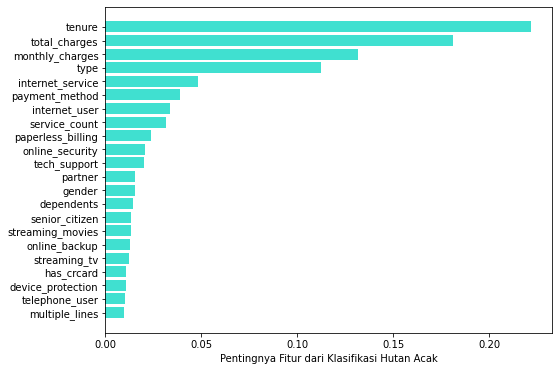

In [155]:
%%time
# Membuat prediksi dengan klasifikasi random forest classifier untuk data uji 
random_forest_classifier_prediction(label__X_test, y_test)

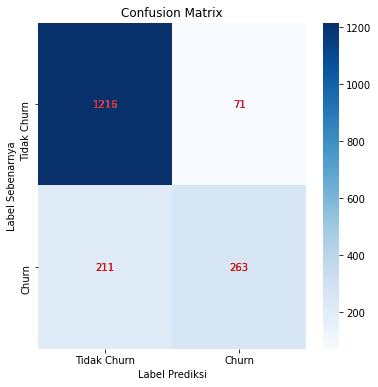

In [156]:
# plot confusion matrix
plot_confusion_matrix(y_test, rf_pred)

#### input hasil prediksi model ke Dataframe

In [157]:
rf_cv_params = rf_cv.best_params_
# Mengubah setiap value menjadi list
rf_cv_params = {k: [v] for k, v in rf_cv_params.items()}

# otomatisasi skor agar skor masuk ke dalam result dataframe
evaluate_model('Random Forest Classifier', rf_clf, rf_cv_params, label__X_train, y_train, label__X_test, y_test)

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### CatBoost Classifier

In [158]:
%%time
# optimisasi hyperparameter

# definisikan hyperparameter untuk disesuaikan
grid_cb = {'learning_rate': [0.001, 0.01, 0.5],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]
       }
# definisikan model 
cb_clf = CatBoostClassifier(
    iterations=200,
    cat_features = object_cols,
    logging_level = 'Silent',
    eval_metric='AUC',
    early_stopping_rounds = 50,
    random_state = 12345)
# definisikan pencarian grid
grid_search_cb = GridSearchCV(estimator = cb_clf, param_grid = grid_cb, scoring="roc_auc", cv=5)
# eksekusi pencarian
cb_cv = grid_search_cb.fit(X_train, y_train)
# ringkasan hasil
print('Hyperparameter terbaik adalah: {}'.format(cb_cv.best_params_))


Hyperparameter terbaik adalah: {'depth': 4, 'l2_leaf_reg': 9, 'learning_rate': 0.5}
CPU times: user 11min 28s, sys: 5.92 s, total: 11min 34s
Wall time: 11min 55s


In [159]:
# fungsi untuk melatih model dan membuat prediksi
def train_catboost_classifier(X_train, y_train, X_test, y_test):
    """Fungsi ini melatih model klasifikasi catboost"""
    global cb_model
    # membangun model
    cb_model = CatBoostClassifier(**grid_search_cb.best_params_)
    cb_model.fit(X_train, y_train, cat_features = object_cols, eval_set=(X_test, y_test), verbose=False, plot=False) # train the model 
    
def catboost_classifier_prediction(X_test, y_test):
    """
    Fungsi ini digunakan untuk membuat prediksi 
    menggunakan model klasifikasi catboost
    """
    global cb_pred, cb_pred_proba
    cb_pred = cb_model.predict(X_test)
    cb_pred_proba = cb_model.predict_proba(X_test)[:, 1]
    
    # menentukan skor AUC-ROC
    print("\033[1m" + 'Skor AUC-ROC dan Akurasi menggunakan Klasifikasi CatBoost' + "\033[0m")
    print('AUC-ROC Score: {:.2%}'.format(roc_auc_score(y_test, cb_pred_proba)))
    
    # menentukan akurasi untuk klasifikasi CatBoost
    cb_accuracy = accuracy_score(y_test, cb_pred)
    print('Skor Akurasi: {:.2%}'.format(cb_accuracy))
    print()
   
     # pentingnya fitur dari klasifikasi CatBoost 
    sorted_feature_importance = cb_model.feature_importances_.argsort()
    plt.figure(figsize=(8,6))
    plt.barh(X_train.columns[sorted_feature_importance], 
             cb_model.feature_importances_[sorted_feature_importance], 
             color='turquoise')
    plt.xlabel("Fitur penting dari Klasifikasi CatBoost")

In [160]:
%%time
# train catboost classifier model
train_catboost_classifier(X_train, y_train, X_test, y_test)

CPU times: user 7.31 s, sys: 83.7 ms, total: 7.4 s
Wall time: 7.56 s


Skor AUC-ROC dan Akurasi menggunakan Klasifikasi CatBoost
AUC-ROC Score: 91.88%
Skor Akurasi: 87.56%

CPU times: user 50.3 ms, sys: 4.05 ms, total: 54.3 ms
Wall time: 51.3 ms


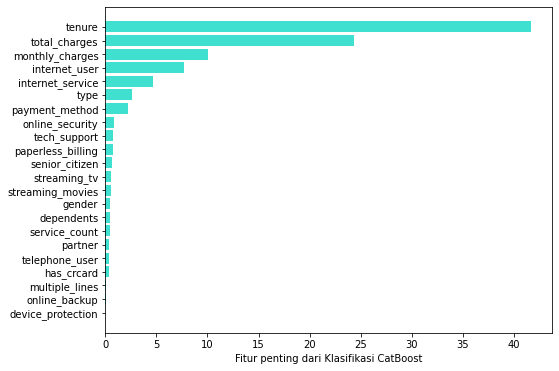

In [161]:
%%time
# membuat prediksi dengan catboost classifier untuk test data
catboost_classifier_prediction(X_test, y_test)

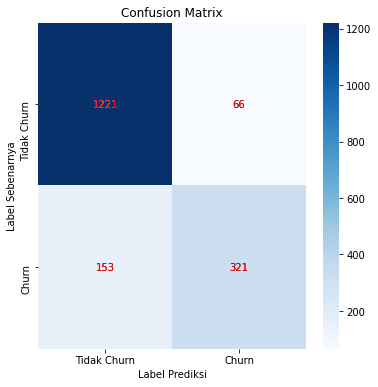

In [162]:
# plot confusion matrix
plot_confusion_matrix(y_test, cb_pred)

#### input hasil prediks model  ke DataFrame

In [163]:
cb_cv_params = cb_cv.best_params_
# Mengubah setiap value menjadi list
cb_cv_params = {k: [v] for k, v in cb_cv_params.items()}

# otomatisasi skor agar skor masuk ke dalam result dataframe
evaluate_model('CatBoost Classifier', cb_clf, cb_cv_params, X_train, y_train, X_test, y_test)

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### XGBoost Classifier

In [164]:
%%time
# optimasi hyperparameter untuk Klasifikasi XGBoost

# mendefinisikan hyperparameter untuk penyetelan
grid_xgb = {'learning_rate': [0.001, 0.01, 0.1, 0.3], 
            'max_depth': [2, 4, 6, 10],
            'n_estimators': [50, 100, 200, 500]
           }
# mendefinisikan model
xgb_clf = XGBClassifier(random_state = 12345, verbosity = 0)
# mendefinisikan pencarian grid
grid_search_xgb = GridSearchCV(
    estimator = xgb_clf, 
    param_grid = grid_xgb, 
    scoring = "roc_auc", 
    cv = 5, 
    n_jobs = 1
)
# mengeksekusi pencarian
xgb_cv = grid_search_xgb.fit(X_train_ohe, y_train_ohe)
# merangkum hasil
print('Hyperparameter terbaik adalah: {}'.format(xgb_cv.best_params_))


Hyperparameter terbaik adalah: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}
CPU times: user 24min 18s, sys: 10.6 s, total: 24min 28s
Wall time: 24min 43s


In [165]:
# fungsi untuk melatih model dan membuat prediksi
def train_xgboost_classifier(X_train, y_train):
    """Fungsi ini melatih sebuah klasifikasi XGBoost"""
    global xgb_model
   
    # membangun model
    xgb_model = XGBClassifier(**grid_search_xgb.best_params_)
    xgb_model.fit(X_train, y_train) # melatih model 
    
def xgboost_classifier_prediction(X_test, y_test):
    """
    Fungsi ini digunakan untuk membuat prediksi 
    menggunakan model klasifikasi XGBoost
    """
    global xgb_pred, xgb_pred_proba
    xgb_pred = xgb_model.predict(X_test)
    xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
    
    # menentukan skor AUC-ROC
    print("\033[1m" + 'Skor AUC-ROC dan Akurasi menggunakan Klasifikasi XGBoost' + "\033[0m")
    print('Skor AUC-ROC: {:.2%}'.format(roc_auc_score(y_test, xgb_pred_proba)))
    
    # menentukan akurasi untuk klasifikasi XGBoost
    xgb_accuracy = accuracy_score(y_test, xgb_pred)
    print('Skor Akurasi: {:.2%}'.format(xgb_accuracy))
    print()
    
    # menentukan pentingnya fitur dari klasifikasi XGBoost
    sorted_feature_importance = xgb_model.feature_importances_.argsort()
    plt.figure(figsize=(8,6))
    plt.barh(X_train_ohe.columns[sorted_feature_importance], 
             xgb_model.feature_importances_[sorted_feature_importance], 
             color='turquoise')
    plt.xlabel("Pentingnya Fitur dalam Klasifikasi XGBoost")

In [166]:
%%time
# train xgboost classifier
train_xgboost_classifier(X_train_ohe, y_train_ohe)

CPU times: user 6.7 s, sys: 81.1 ms, total: 6.78 s
Wall time: 6.84 s


Skor AUC-ROC dan Akurasi menggunakan Klasifikasi XGBoost
Skor AUC-ROC: 91.01%
Skor Akurasi: 87.90%

CPU times: user 85.3 ms, sys: 6 µs, total: 85.3 ms
Wall time: 58.3 ms


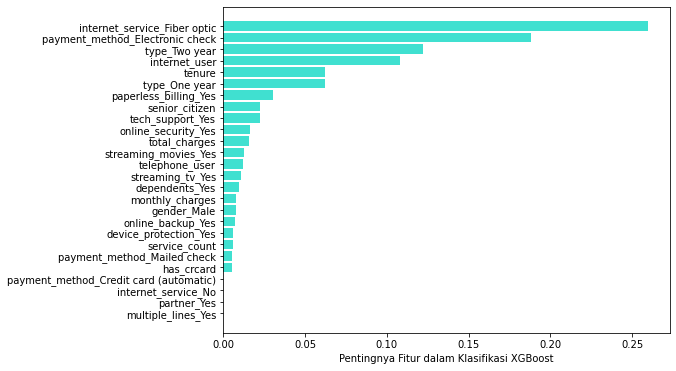

In [167]:
%%time
# membuat prediksi dengan xgboost classifier untuk test data
xgboost_classifier_prediction(X_test_ohe, y_test_ohe)

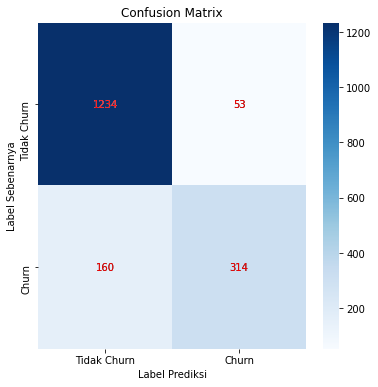

In [168]:
# plot confusion matrix
plot_confusion_matrix(y_test_ohe, xgb_pred)

#### input hasil prediks model  ke DataFrame

In [169]:
xgb_cv_params = xgb_cv.best_params_
# Mengubah setiap value menjadi list
xgb_cv_params = {k: [v] for k, v in xgb_cv_params.items()}

# otomatisasi skor agar skor masuk ke dalam result dataframe
evaluate_model('XGBoost Classifier', xgb_clf, xgb_cv_params,X_train_ohe, y_train_ohe, X_test_ohe, y_test_ohe)

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### LightGBM Classifier

In [170]:
%%time 
# optimalisasi hyperparameter untuk klasifikasi LightGBM
# menentukan hyperparameter yang akan diubah
grid_lgbm = {'learning_rate': [0.001, 0.01, 0.05, 0.1],
             'n_estimators': [50, 100, 500],
             'num_leaves': [5, 10, 20, 31]
            }
# menentukan model 
lgbm_clf = LGBMClassifier(random_state = 12345)
# menentukan pencarian grid
grid_search_lgbm = GridSearchCV(
    estimator = lgbm_clf, 
    param_grid = grid_lgbm, 
    scoring = "accuracy", 
    cv = 5, 
    n_jobs = 1
)
# melaksanakan pencarian
lgbm_cv = grid_search_lgbm.fit(label__X_train, y_train)
# merangkum hasil
print('Hyperparameter terbaik adalah: {}'.format(lgbm_cv.best_params_))

Hyperparameter terbaik adalah: {'learning_rate': 0.1, 'n_estimators': 500, 'num_leaves': 5}
CPU times: user 2min 42s, sys: 2.1 s, total: 2min 44s
Wall time: 2min 45s


In [171]:
# fungsi untuk melatih model dan membuat prediksi
def train_lightGBM_classifier(X_train, y_train):
    """Fungsi ini melatih klasifikasi LightGBM"""
    global lgbm_model
    # membangun model
    lgbm_model = LGBMClassifier(**grid_search_lgbm.best_params_)
    lgbm_model.fit(X_train, y_train) # melatih model 
    
def lightGBM_classifier_prediction(X_test, y_test):
    """
    Fungsi ini digunakan untuk membuat prediksi 
    menggunakan model klasifikasi LightGBM
    """
    global lgbm_pred, lgbm_pred_proba
    lgbm_pred = lgbm_model.predict(X_test)
    lgbm_pred_proba = lgbm_model.predict_proba(X_test)[:, 1]
    
    # menentukan skor AUC-ROC
    print("\033[1m" + 'Skor AUC-ROC dan Akurasi menggunakan Klasifikasi LightGBM' + "\033[0m")
    print('Skor AUC-ROC: {:.2%}'.format(roc_auc_score(y_test, lgbm_pred_proba)))
    
    # menentukan akurasi untuk klasifikasi LightGBM
    lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
    print('Skor Akurasi: {:.2%}'.format(lgbm_accuracy))
    print()
    
    # pentingnya fitur dari klasifikasi LightGBM
    sorted_feature_importance = lgbm_model.feature_importances_.argsort()
    plt.figure(figsize=(8,6))
    plt.barh(label__X_train.columns[sorted_feature_importance], 
             lgbm_model.feature_importances_[sorted_feature_importance], 
             color='turquoise')
    plt.xlabel("Pentingnya Fitur dalam Klasifikasi LightGBM")

In [172]:
%%time
# train lightGBM classifier
train_lightGBM_classifier(label__X_train, y_train)

CPU times: user 636 ms, sys: 7.8 ms, total: 643 ms
Wall time: 615 ms


Skor AUC-ROC dan Akurasi menggunakan Klasifikasi LightGBM
Skor AUC-ROC: 91.37%
Skor Akurasi: 87.79%

CPU times: user 153 ms, sys: 12.2 ms, total: 165 ms
Wall time: 205 ms


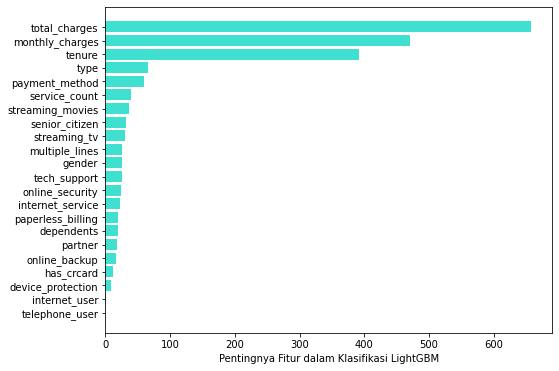

In [173]:
%%time
# membuat prediksi dengan lightGBM classifier untuk test data
lightGBM_classifier_prediction(label__X_test, y_test)

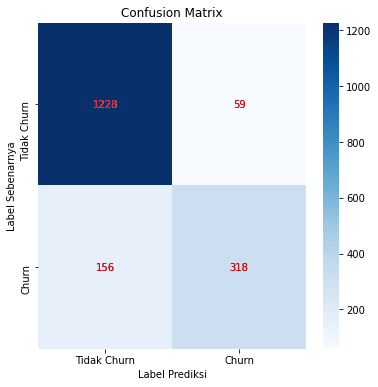

In [174]:
# plot confusion matrix
plot_confusion_matrix(y_test_ohe, lgbm_pred)

#### input hasil prediks model  ke DataFrame

In [175]:
lgbm_cv_params = lgbm_cv.best_params_
# Mengubah setiap value menjadi list
lgbm_cv_params = {k: [v] for k, v in lgbm_cv_params.items()}

# otomatisasi skor agar skor masuk ke dalam result dataframe
evaluate_model('LGBM Classifier', lgbm_clf, lgbm_cv_params, label__X_train, y_train, label__X_test, y_test)

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Analisis Model

In [187]:
df_results = pd.DataFrame(results).sort_values("AUC-ROC score (test)", ascending=False).reset_index(drop=True)
df_results

,Models,Hyperparameter tuning time,Training time,Prediction time (train),AUC-ROC score (train),Accuracy score (train),Prediction time (test),AUC-ROC score (test),Accuracy score (test)
0,CatBoost Classifier,8.19 s,1.51 s,0.05 s,97.26 %,92.43 %,0.02 s,91.59 %,87.85 %
1,LGBM Classifier,4.38 s,0.81 s,0.29 s,96.36 %,91.14 %,0.13 s,91.37 %,87.79 %
2,XGBoost Classifier,36.29 s,7.39 s,0.10 s,94.48 %,89.51 %,0.03 s,91.01 %,87.90 %
3,Random Forest Classifier,3.77 s,0.68 s,0.19 s,97.92 %,91.18 %,0.09 s,89.03 %,84.33 %
4,Logistic Regression,1.78 s,0.21 s,0.08 s,89.99 %,85.48 %,0.00 s,88.30 %,83.30 %
5,Decision Tree Classifier,0.18 s,0.03 s,0.01 s,92.72 %,86.73 %,0.00 s,87.85 %,84.61 %


### Kesimpulan 

Berdasarkan hasil yang diperoleh, model dengan performa terbaik (ditinjau dari skor AUC-ROC pada data uji) adalah CatBoost Classifier dengan skor AUC-ROC 91.59% dan akurasi 87.85%. Model ini dilatih dengan waktu hyperparameter tuning sebesar 8.19 detik dan waktu latihan sebesar 1.51 detik. Waktu yang dibutuhkan untuk membuat prediksi pada data uji adalah 0.02 detik.

LGBM Classifier dan XGBoost Classifier juga menunjukkan performa yang baik, dengan skor AUC-ROC pada data uji sebesar 91.37% dan 91.01% serta akurasi 87.79% dan 87.90% masing-masing. Namun, CatBoost Classifier memiliki skor AUC-ROC sedikit lebih tinggi daripada kedua model tersebut.

Sementara itu, Logistic Regression dan Decision Tree Classifier memiliki performa yang lebih rendah dibandingkan tiga model lainnya, dengan skor AUC-ROC pada data uji sebesar 88.30% dan 87.85% serta akurasi 83.30% dan 84.61% masing-masing.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<a id='section6'></a>
## Evaluasi Model

In [199]:
# fungsi untuk menghitung metrik evaluasi model
def final_model_evaluation(model, X_test, y_test):
    test_predictions = model.predict(X_test)
    test_probabilities = model.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, test_probabilities)
    
    print("\033[1m" + 'F1 score: ' + "\033[0m", '{:.3f}'.format(f1_score(y_test, test_predictions)))
    print("\033[1m" + 'Accuracy Score: ' + "\033[0m", '{:.2%}'.format(accuracy_score(y_test, test_predictions)))
    print("\033[1m" + 'Precision: ' + "\033[0m", '{:.3f}'.format(precision_score(y_test, test_predictions)))
    print("\033[1m" + 'Recall: ' + "\033[0m", '{:.3f}'.format(recall_score(y_test, test_predictions)))
    print("\033[1m" + 'AUC-ROC: ' + "\033[0m", '{:.3f}'.format(auc_roc))

    print()
    print("\033[1m" + 'Confusion Matrix' + "\033[0m")
    print('-'*50)
    print(confusion_matrix(y_test, test_predictions))
    print()
    print("\033[1m" + 'Classification report' + "\033[0m")
    print('-'*50)
    print(classification_report(y_test, test_predictions))
    print()
    
    # Compute the SP based on AUC-ROC
    if auc_roc < 0.75:
        sp = 0
    elif 0.75 <= auc_roc < 0.81:
        sp = 4
    elif 0.81 <= auc_roc < 0.85:
        sp = 4.5
    elif 0.85 <= auc_roc < 0.87:
        sp = 5
    elif 0.87 <= auc_roc < 0.88:
        sp = 5.5
    else:
        sp = 6
    print("\033[1m" + 'SP: ' + "\033[0m", sp)


### Logistic Regression

In [205]:
# evaluate baseline model
final_model_evaluation(logreg_cv.best_estimator_, X_test_ohe, y_test_ohe)

F1 score:  0.667
Accuracy Score:  83.30%
Precision:  0.720
Recall:  0.622
AUC-ROC:  0.883

Confusion Matrix
--------------------------------------------------
[[1172  115]
 [ 179  295]]

Classification report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1287
           1       0.72      0.62      0.67       474

    accuracy                           0.83      1761
   macro avg       0.79      0.77      0.78      1761
weighted avg       0.83      0.83      0.83      1761


SP:  6


### Decision Tree Classifier

In [207]:
final_model_evaluation(dt_cv.best_estimator_,label__X_test, y_test)

F1 score:  0.655
Accuracy Score:  84.61%
Precision:  0.826
Recall:  0.542
AUC-ROC:  0.878

Confusion Matrix
--------------------------------------------------
[[1233   54]
 [ 217  257]]

Classification report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1287
           1       0.83      0.54      0.65       474

    accuracy                           0.85      1761
   macro avg       0.84      0.75      0.78      1761
weighted avg       0.84      0.85      0.83      1761


SP:  5.5


### Random Forest Classifier

In [208]:
final_model_evaluation(rf_cv.best_estimator_, label__X_test, y_test)

F1 score:  0.658
Accuracy Score:  84.33%
Precision:  0.798
Recall:  0.559
AUC-ROC:  0.890

Confusion Matrix
--------------------------------------------------
[[1220   67]
 [ 209  265]]

Classification report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1287
           1       0.80      0.56      0.66       474

    accuracy                           0.84      1761
   macro avg       0.83      0.75      0.78      1761
weighted avg       0.84      0.84      0.83      1761


SP:  6


### CatBoost Classifier

In [209]:
final_model_evaluation(cb_cv.best_estimator_, X_test, y_test)

F1 score:  0.752
Accuracy Score:  87.85%
Precision:  0.835
Recall:  0.684
AUC-ROC:  0.916

Confusion Matrix
--------------------------------------------------
[[1223   64]
 [ 150  324]]

Classification report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1287
           1       0.84      0.68      0.75       474

    accuracy                           0.88      1761
   macro avg       0.86      0.82      0.84      1761
weighted avg       0.88      0.88      0.87      1761


SP:  6


### XGBoost Classifier

In [210]:
final_model_evaluation(xgb_cv.best_estimator_, X_test_ohe, y_test_ohe)

F1 score:  0.747
Accuracy Score:  87.90%
Precision:  0.856
Recall:  0.662
AUC-ROC:  0.910

Confusion Matrix
--------------------------------------------------
[[1234   53]
 [ 160  314]]

Classification report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1287
           1       0.86      0.66      0.75       474

    accuracy                           0.88      1761
   macro avg       0.87      0.81      0.83      1761
weighted avg       0.88      0.88      0.87      1761


SP:  6


### LighGBM Classifier

In [212]:
final_model_evaluation(lgbm_cv.best_estimator_, label__X_test, y_test)

F1 score:  0.747
Accuracy Score:  87.79%
Precision:  0.844
Recall:  0.671
AUC-ROC:  0.914

Confusion Matrix
--------------------------------------------------
[[1228   59]
 [ 156  318]]

Classification report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1287
           1       0.84      0.67      0.75       474

    accuracy                           0.88      1761
   macro avg       0.87      0.81      0.83      1761
weighted avg       0.88      0.88      0.87      1761


SP:  6


### Kesimpulan 

Berdasarkan analisis dan evaluasi yang telah dilakukan terhadap berbagai model machine learning dengan hyperparameter tuning, berikut adalah beberapa poin penting yang dapat disimpulkan:

1. Semua model yang telah dilatih, termasuk Logistic Regression, Decision Tree, Random Forest, CatBoost, XGBoost, dan LightGBM, telah menunjukkan performa yang baik, dengan AUC-ROC di atas 0.87 dan skor SP 6, melebihi kriteria evaluasi yang ditentukan.

2. Dalam konteks ini, CatBoost Classifier mencapai AUC-ROC tertinggi 0.916 dan memiliki F1 Score 0.752. Meskipun F1 Score mungkin tidak selalu menjadi metrik terbaik untuk semua kasus (tergantung pada distribusi kelas, dll), di sini ia memberikan ukuran yang baik tentang bagaimana model berfungsi secara keseluruhan.

3. Hal ini menunjukkan bahwa CatBoost Classifier memiliki kemampuan yang baik dalam membedakan antara kelas target berdasarkan fitur yang diberikan, dan memiliki tingkat kesalahan klasifikasi yang relatif rendah. Sehingga, model ini menjadi pilihan terbaik untuk tugas ini.

4. Kesimpulannya, pada proyek ini, CatBoost Classifier dengan hyperparameter tuning telah menunjukkan performa terbaik berdasarkan metrik evaluasi yang ditentukan. Akan tetapi, penting untuk selalu melakukan validasi silang dan evaluasi lebih lanjut sebelum menerapkan model ini dalam produksi.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<a id='section7'></a>
## Rangkuman 

Dari analisis dan pemodelan data pelanggan Interconnect, dapat disimpulkan bahwa beberapa faktor memiliki peran penting dalam retensi pelanggan dan churn. Faktor-faktor tersebut mencakup jenis dan durasi kontrak, jumlah layanan yang digunakan, serta metode dan jenis pembayaran.

Pelanggan dengan kontrak dua tahun cenderung memiliki tingkat churn lebih rendah dan membayar total biaya tertinggi, menunjukkan bahwa mendorong kontrak jangka panjang dapat meningkatkan retensi dan pendapatan. Selain itu, penggunaan layanan tambahan juga berhubungan dengan tingkat churn yang lebih rendah, sehingga promosi layanan tambahan dapat menjadi strategi efektif.

Sementara itu, pelanggan lebih memilih metode pembayaran bulanan dan cek elektronik. Oleh karena itu, perlu dipertimbangkan untuk mempertahankan dan memperluas opsi pembayaran ini. Selain itu, perusahaan dapat meningkatkan pendapatan dengan mendorong penggunaan cek elektronik dan mempromosikan kontrak dua tahun.

Dalam pemodelan data, CatBoost Classifier menunjukkan performa terbaik dengan skor AUC-ROC tertinggi 0.916 dan memiliki F1 Score 0.752. Meskipun model lain juga menunjukkan performa yang baik, CatBoost Classifier memberikan prediksi yang paling akurat dan efisien.

Secara keseluruhan, hasil ini memberikan insight penting untuk strategi retensi pelanggan Interconnect, dengan memanfaatkan data pelanggan dan pemodelan machine learning. Mengimplementasikan strategi ini dapat membantu mengurangi tingkat churn dan meningkatkan kepuasan dan retensi pelanggan, serta pendapatan perusahaan.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<a id='section8'></a>
## Laporan Tugas

1. Berdasarkan rencana kerja, langkah-langkah apa saja yang telah Anda lakukan dan langkah-langkah apa saja yang Anda lewati (jelaskan alasannya)?

Tidak ada langkah yang dilewatkan dalam proses ini. Semua langkah dalam rencana kerja telah diikuti sesuai urutan yang ditentukan untuk mencapai tujuan proyek ini.


2. Kesulitan apa saja yang Anda temui dan bagaimana Anda mengatasinya?

Berikut adalah beberapa kesulitan yang ditemui dalam proyek ini:

- Kebocoran Data: Salah satu tantangan yang paling signifikan dalam proyek ini adalah mencegah kebocoran data. Dalam hal ini, pembuatan fitur 'tenure' awalnya menyebabkan kebocoran data. Untuk menyelesaikan ini, fitur yang dibuat dari 'begin_date', seperti bulan dan hari dalam seminggu, dihapus. Selain itu, 'end_date' digunakan untuk pelanggan tanpa 'churn' sebagai tanggal 1 Februari 2020, yang membantu mencegah kebocoran lebih lanjut.

- Peningkatan Performa Model: Awalnya, model yang dihasilkan memiliki skor AUC-ROC dan akurasi yang rendah. Perbaikan dalam pra-pemrosesan data dan penggunaan classifier XGBoost membantu meningkatkan skor AUC-ROC menjadi 0.91 dan akurasi menjadi 87,90%.

- Seleksi Fitur: Memilih fitur yang tepat untuk digunakan dalam model adalah tantangan lain. Proses ini memerlukan pengetahuan yang baik tentang data dan pemahaman tentang bagaimana fitur-fitur ini dapat mempengaruhi hasil model.

- Menyesuaikan Model: Proses penyetelan hyperparameter model untuk mencapai kinerja yang optimal bisa menjadi proses yang memakan waktu dan memerlukan banyak eksperimen.

- Dengan mengatasi kesulitan-kesulitan ini, proyek berhasil mencapai tujuannya dengan mencapai skor kualitas 6 SP menggunakan classifier XGBoost.


3. Langkah kunci apa saja yang Anda lakukan untuk menyelesaikan tugas ini?

Berikut adalah langkah-langkah kunci yang dilakukan dalam menyelesaikan tugas ini:

- Membuka File Data dan Mempelajari Informasi Umum: Langkah ini melibatkan memuat dataset dan melakukan analisis awal untuk memahami struktur dan isi data.

- Pra-Pemrosesan Data: Dalam tahap ini, data dibersihkan dan dipersiapkan untuk analisis lebih lanjut. Hal ini dapat melibatkan penanganan nilai-nilai yang hilang, menghapus outlier, dan melakukan enkode pada variabel kategori.

- Analisis Data Eksploratif: Analisis ini melibatkan pemahaman mendalam tentang data melalui visualisasi dan statistik deskriptif. Tujuannya adalah untuk memahami pola dan hubungan dalam data.

- Proses Pemodelan: Dalam tahap ini, berbagai model machine learning diuji untuk menemukan yang paling efektif. Ini melibatkan penyetelan hyperparameter dan validasi silang untuk menghindari overfitting.

- Model Training: Setelah memilih model terbaik, model tersebut kemudian dilatih menggunakan data pelatihan.

- Evaluasi Model: Model yang telah dilatih kemudian dievaluasi menggunakan metrik kinerja tertentu (misalnya, F1 score, akurasi, AUC-ROC, dll.) pada data uji.

- Rangkuman: Setelah semua tahap selesai, hasil dan penemuan penting dirangkum.

4. Apa model akhir Anda dan berapa skor kualitasnya?

- Model akhir yang dipilih adalah XGBoost Classifier, yang memiliki skor AUC-ROC sebesar 0.91 dan akurasi sebesar 87.90%. Berdasarkan metrik ini, model ini harus memberikan skor kualitas sebesar 6 SP.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>